# Bag-of-Words - SIFT (K = 25)

In [1]:
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
import array
import glob

image_folder1 = []
image_folder2 = []
image_folder3 = []
image_folder4 = []
image_folder5 = []
training_set = []

for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/airplanes/*.jpg"):
    image_folder1.append(img)
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/Faces_easy/*.jpg"):
    image_folder2.append(img)
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/Leopards/*.jpg"):
    image_folder3.append(img)  
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/Motorbikes/*.jpg"):
    image_folder4.append(img)    
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/watch/*.jpg"):
    image_folder5.append(img)
    
training_length1 = int(len(image_folder1)/2)
training_length2 = int(len(image_folder2)/2)
training_length3 = int(len(image_folder3)/2)
training_length4 = int(len(image_folder4)/2)
training_length5 = int(len(image_folder5)/2)

for i in range(0, training_length1):
    training_set.append(image_folder1[i])
for i in range(0, training_length2):
    training_set.append(image_folder2[i])
for i in range(0, training_length3):
    training_set.append(image_folder3[i])
for i in range(0, training_length4):
    training_set.append(image_folder4[i])
for i in range(0, training_length5):
    training_set.append(image_folder5[i])

Elapsed time: 667.2138030529022


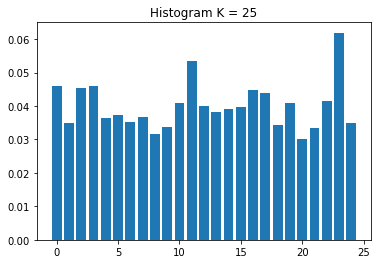

In [2]:
# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create(100)   
total_des = np.array
t0 = time.time() 

def find_histogram(K):  
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
    compactness, labels, centers25 = cv2.kmeans(total_des, K, None, criteria, 100, flags=cv2.KMEANS_RANDOM_CENTERS)
    freq_plot = np.zeros(K)
    total_points = len(total_des)
    name = np.zeros(K)
    for i in range(0, K):
        A = total_des[labels.ravel()==i]
        freq_plot[i] = A.shape[0]/total_points
        name[i] = str(i)
    return name, freq_plot, centers25

i = True   
for images in training_set:
    # load image 
    img = cv2.imread(images)
    # compute SIFT descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)
    if i == True:
        total_des = descriptors
        i = False
    else:
        total_des = np.append(total_des, descriptors, axis = 0)

name1, freq_plot1, centers25 = find_histogram(25)
print("Elapsed time:", time.time() - t0)

# display images
plt.subplot(111), plt.bar(name1, freq_plot1)
plt.title("Histogram K = 25")
plt.show()

# Bag-of-Words - SIFT (K = 50)

Elapsed time: 2078.002196073532


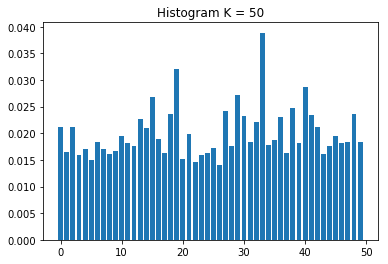

In [3]:
def find_histogram(K):  
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
    compactness, labels, centers50 = cv2.kmeans(total_des, K, None, criteria, 100, flags=cv2.KMEANS_RANDOM_CENTERS)
    freq_plot = np.zeros(K)
    total_points = len(total_des)
    name = np.zeros(K)
    for i in range(0, K):
        A = total_des[labels.ravel()==i]
        freq_plot[i] = A.shape[0]/total_points
        name[i] = str(i)
    return name, freq_plot, centers50

i = True  
for images in training_set:
    # load image 
    img = cv2.imread(images)
    # compute SIFT descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)
    if i == True:
        total_des = descriptors
        i = False
    else:
        total_des = np.append(total_des, descriptors, axis = 0)

name2, freq_plot2, centers50 = find_histogram(50)
print("Elapsed time:", time.time() - t0)

# display images
plt.subplot(111), plt.bar(name2, freq_plot2)
plt.title("Histogram K = 50")
plt.show()

# Bag-of-Words - SIFT (K = 100)

Elapsed time: 2787.646722793579


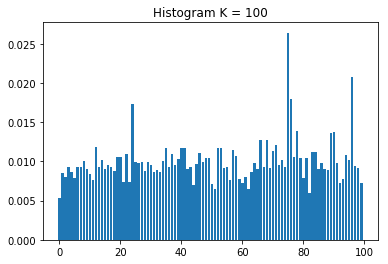

In [4]:
# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create(100)   
total_des = np.array
t0 = time.time()

def find_histogram(K):  
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
    compactness, labels, centers100 = cv2.kmeans(total_des, K, None, criteria, 100, flags=cv2.KMEANS_RANDOM_CENTERS)
    freq_plot = np.zeros(K)
    total_points = len(total_des)
    name = np.zeros(K)
    for i in range(0, K):
        A = total_des[labels.ravel()==i]
        freq_plot[i] = A.shape[0]/total_points
        name[i] = str(i)
    return name, freq_plot, centers100

i = 0     
for images in training_set:
    # load image 
    img = cv2.imread(images)
    # compute SIFT descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)
    if i == 0:
        total_des = descriptors
    else:
        total_des = np.append(total_des, descriptors, axis = 0)
    i += 1

name3, freq_plot3, centers100 = find_histogram(100)
print("Elapsed time:", time.time() - t0)

# display images
plt.subplot(111), plt.bar(name3, freq_plot3)
plt.title("Histogram K = 100")
plt.show()

## SIFT Airplanes

Elapsed time: 0.5328021049499512


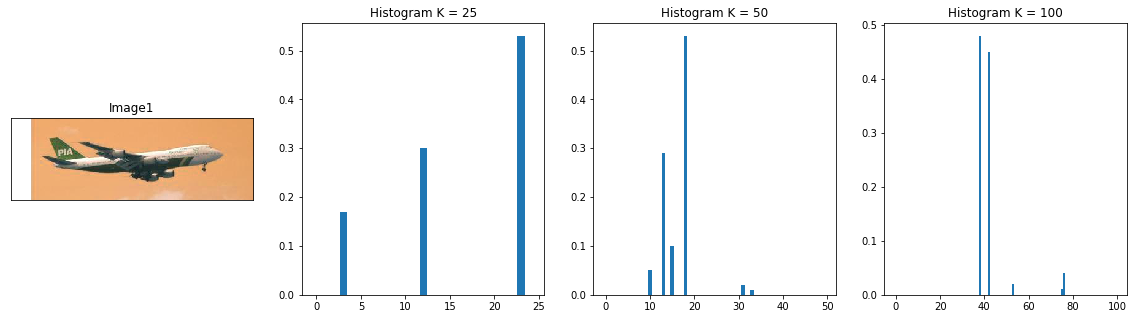

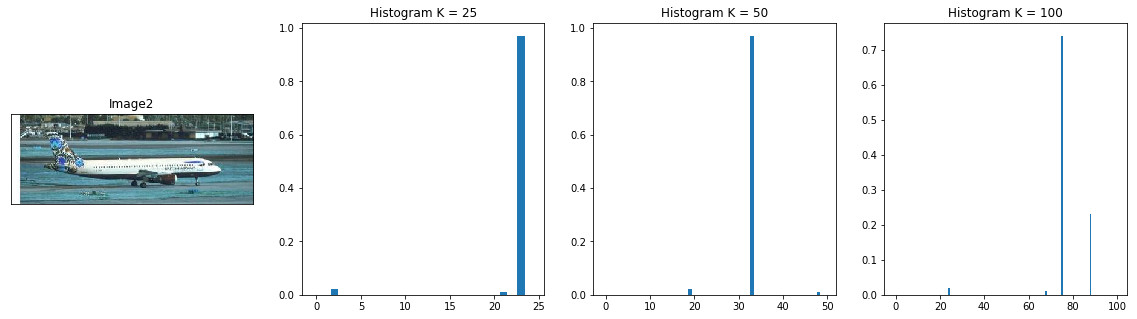

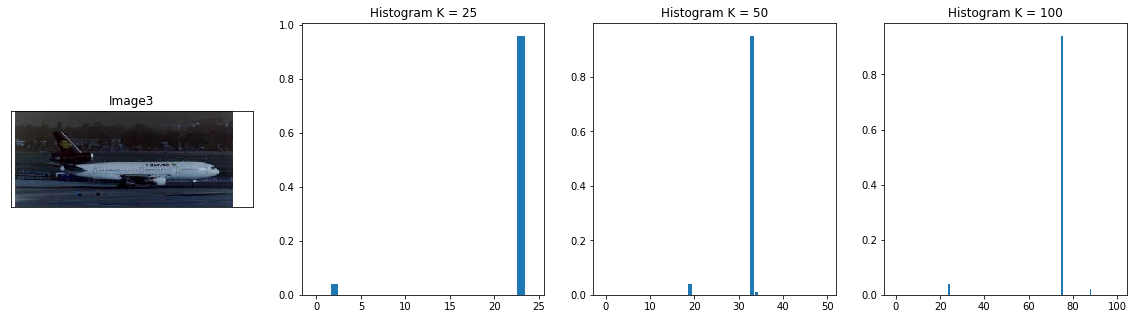

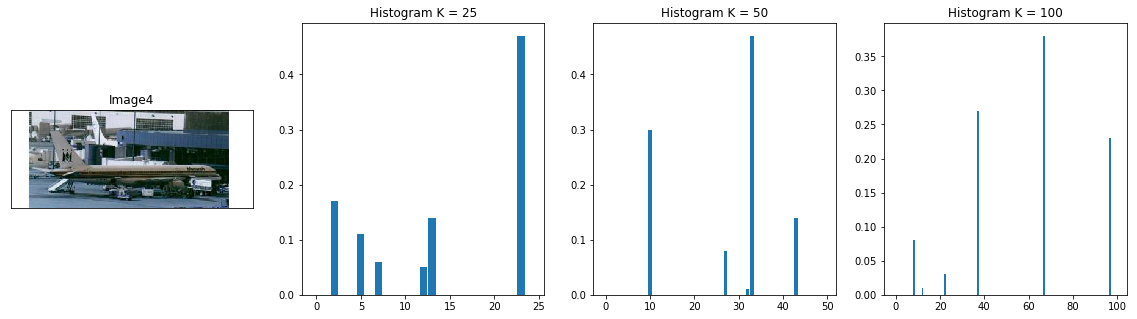

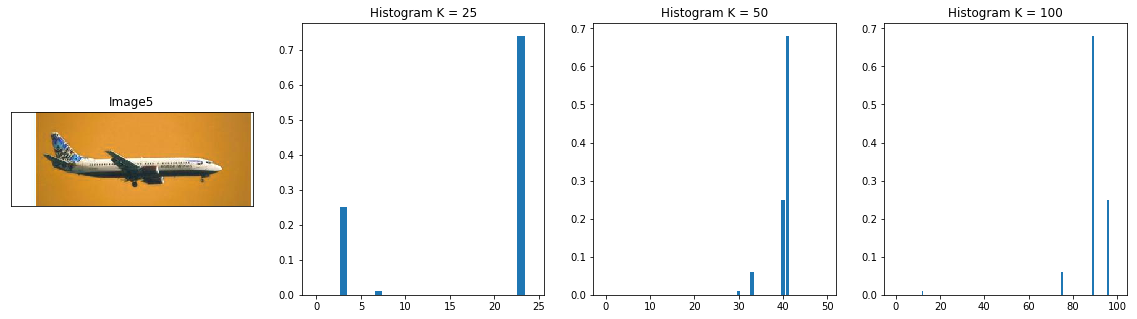

In [5]:
image_folder = []
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/airplanes/*.jpg"):
    image_folder.append(img)

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create(100)   

i = 0
t0 = time.time() 

def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    # compute SIFT descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)
    histogram = np.zeros(K)
    min_index = -1
    min_dist = float('inf')
    for i in range(descriptors.shape[0]):
        for j in range(0, K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1
    
    total_points = len(descriptors)
    name = np.zeros(K)
    for i in range(0, K):
        histogram[i] /= total_points
        name[i] = str(i)
    return name, histogram

display_img0 = cv2.imread(image_folder[0])
name00, hist00 = find_histogram(image_folder[0], 25, centers25)
name01, hist01 = find_histogram(image_folder[0], 50, centers50)
name02, hist02 = find_histogram(image_folder[0], 100, centers100)

display_img1 = cv2.imread(image_folder[1])
name11, hist11 = find_histogram(image_folder[1], 25, centers25)
name12, hist12 = find_histogram(image_folder[1], 50, centers50)
name13, hist13 = find_histogram(image_folder[1], 100, centers100)

display_img2 = cv2.imread(image_folder[2])
name21, hist21 = find_histogram(image_folder[2], 25, centers25)
name22, hist22 = find_histogram(image_folder[2], 50, centers50)
name23, hist23 = find_histogram(image_folder[2], 100, centers100)

display_img3 = cv2.imread(image_folder[3])
name31, hist31 = find_histogram(image_folder[3], 25, centers25)
name32, hist32 = find_histogram(image_folder[3], 50, centers50)
name33, hist33 = find_histogram(image_folder[3], 100, centers100)

display_img4 = cv2.imread(image_folder[4])
name41, hist41 = find_histogram(image_folder[4], 25, centers25)
name42, hist42 = find_histogram(image_folder[4], 50, centers50)
name43, hist43 = find_histogram(image_folder[4], 100, centers100)
    
print("Elapsed time:", time.time() - t0)

# display images
plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img0, cmap="gray")
plt.title("Image1"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name00, hist00)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name01, hist01)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name02, hist02)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img1, cmap="gray")
plt.title("Image2"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name11, hist11)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name12, hist12)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name13, hist13)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img2, cmap="gray")
plt.title("Image3"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name21, hist21)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name22, hist22)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name23, hist23)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img3, cmap="gray")
plt.title("Image4"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name31, hist31)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name32, hist32)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name33, hist33)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img4, cmap="gray")
plt.title("Image5"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name41, hist41)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name42, hist42)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name43, hist43)
plt.title("Histogram K = 100")
plt.show()

## SIFT Faces

Elapsed time: 0.6769099235534668


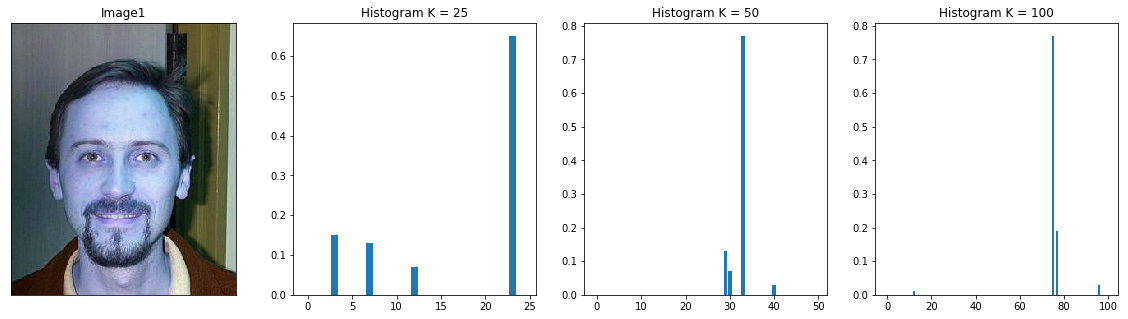

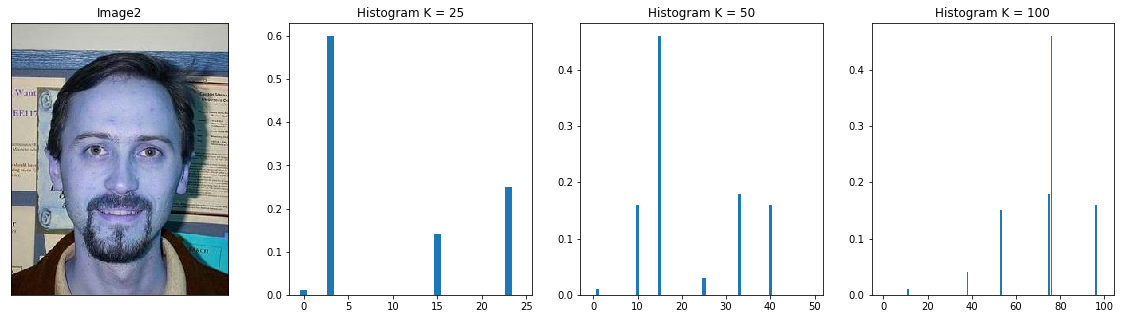

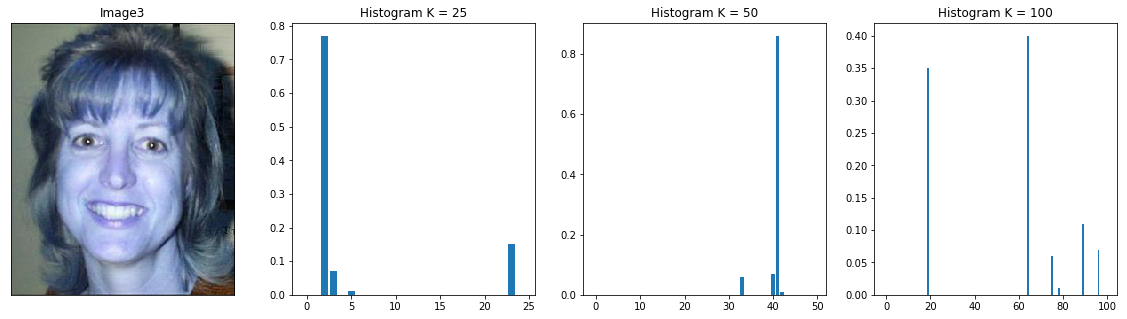

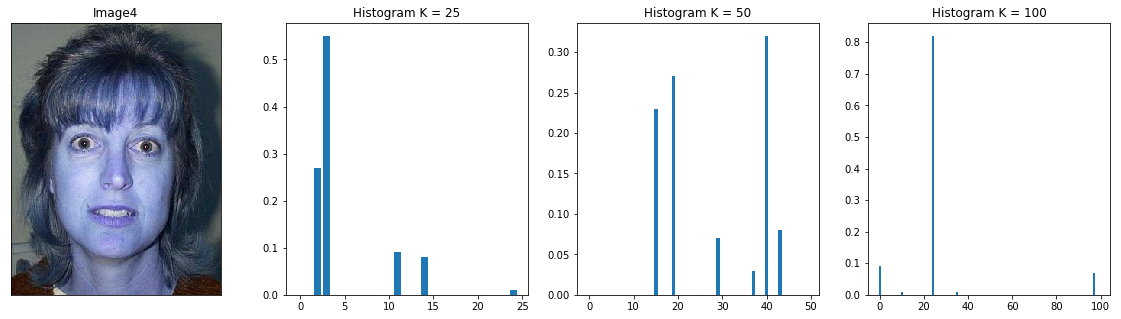

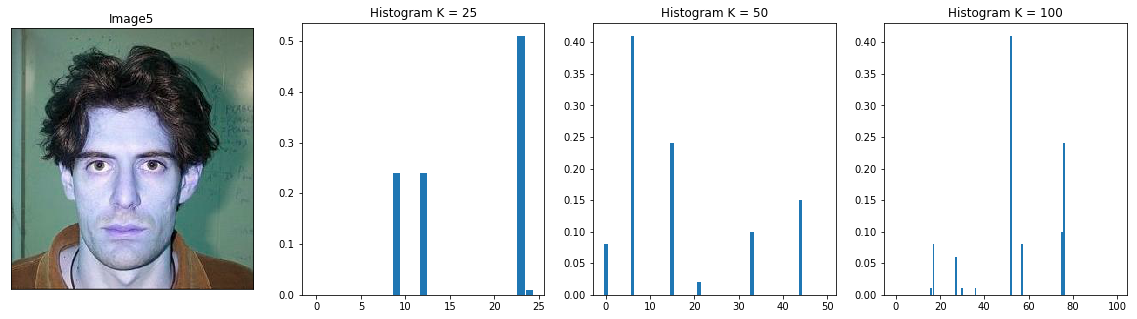

In [6]:
image_folder = []
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/Faces_easy/*.jpg"):
    image_folder.append(img)

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create(100)   

i = 0
t0 = time.time() 

def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    # compute SIFT descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)
    histogram = np.zeros(K)
    min_index = -1
    min_dist = float('inf')
    for i in range(descriptors.shape[0]):
        for j in range(0, K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1

    total_points = len(descriptors)
    name = np.zeros(K)
    for i in range(0, K):
        histogram[i] /= total_points
        name[i] = str(i)
    return name, histogram

display_img0 = cv2.imread(image_folder[0])
name00, hist00 = find_histogram(image_folder[0], 25, centers25)
name01, hist01 = find_histogram(image_folder[0], 50, centers50)
name02, hist02 = find_histogram(image_folder[0], 100, centers100)

display_img1 = cv2.imread(image_folder[1])
name11, hist11 = find_histogram(image_folder[1], 25, centers25)
name12, hist12 = find_histogram(image_folder[1], 50, centers50)
name13, hist13 = find_histogram(image_folder[1], 100, centers100)

display_img2 = cv2.imread(image_folder[2])
name21, hist21 = find_histogram(image_folder[2], 25, centers25)
name22, hist22 = find_histogram(image_folder[2], 50, centers50)
name23, hist23 = find_histogram(image_folder[2], 100, centers100)

display_img3 = cv2.imread(image_folder[3])
name31, hist31 = find_histogram(image_folder[3], 25, centers25)
name32, hist32 = find_histogram(image_folder[3], 50, centers50)
name33, hist33 = find_histogram(image_folder[3], 100, centers100)

display_img4 = cv2.imread(image_folder[4])
name41, hist41 = find_histogram(image_folder[4], 25, centers25)
name42, hist42 = find_histogram(image_folder[4], 50, centers50)
name43, hist43 = find_histogram(image_folder[4], 100, centers100)
    
print("Elapsed time:", time.time() - t0)

# display images
plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img0, cmap="gray")
plt.title("Image1"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name00, hist00)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name01, hist01)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name02, hist02)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img1, cmap="gray")
plt.title("Image2"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name11, hist11)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name12, hist12)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name13, hist13)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img2, cmap="gray")
plt.title("Image3"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name21, hist21)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name22, hist22)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name23, hist23)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img3, cmap="gray")
plt.title("Image4"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name31, hist31)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name32, hist32)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name33, hist33)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img4, cmap="gray")
plt.title("Image5"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name41, hist41)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name42, hist42)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name43, hist43)
plt.title("Histogram K = 100")
plt.show()

## SIFT Leopards

Elapsed time: 0.375499963760376


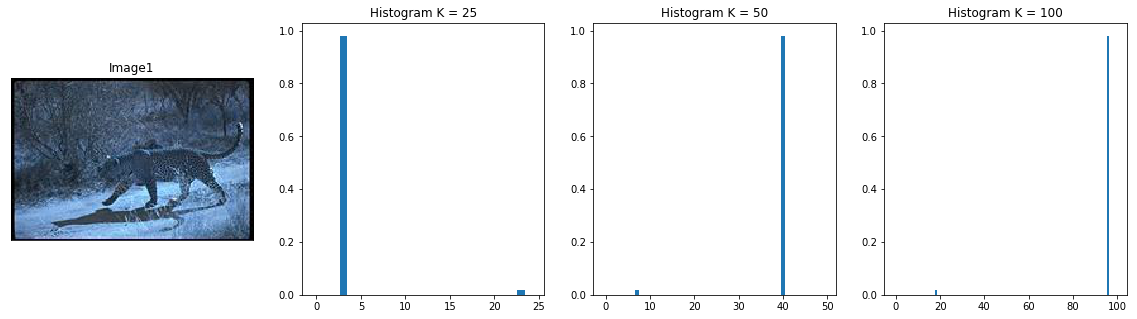

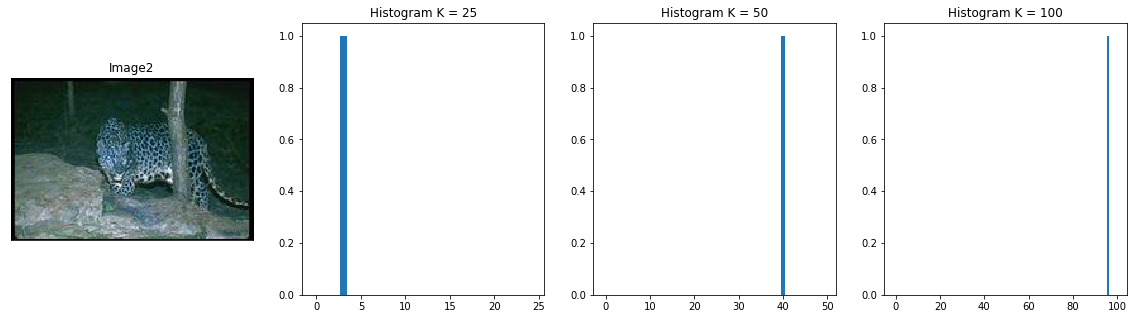

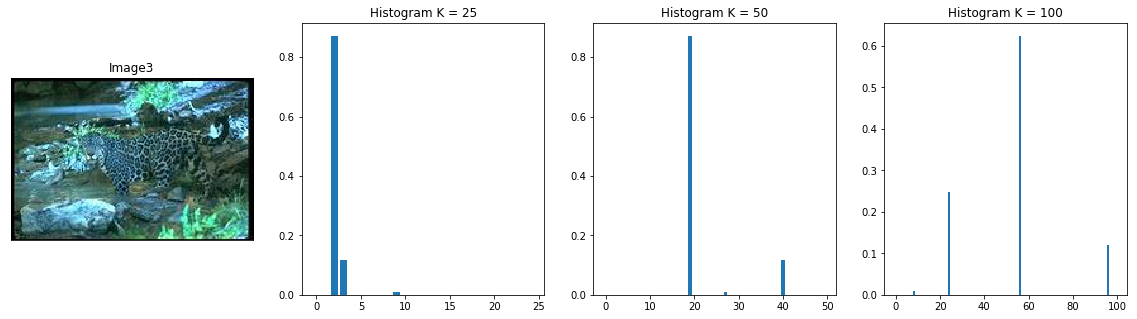

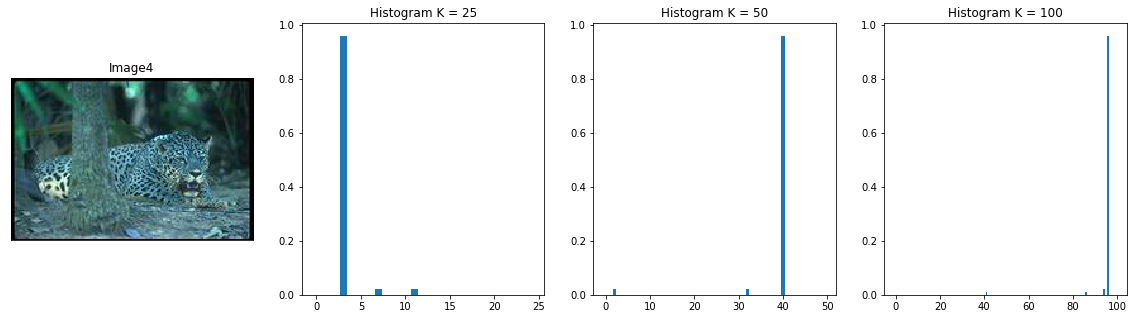

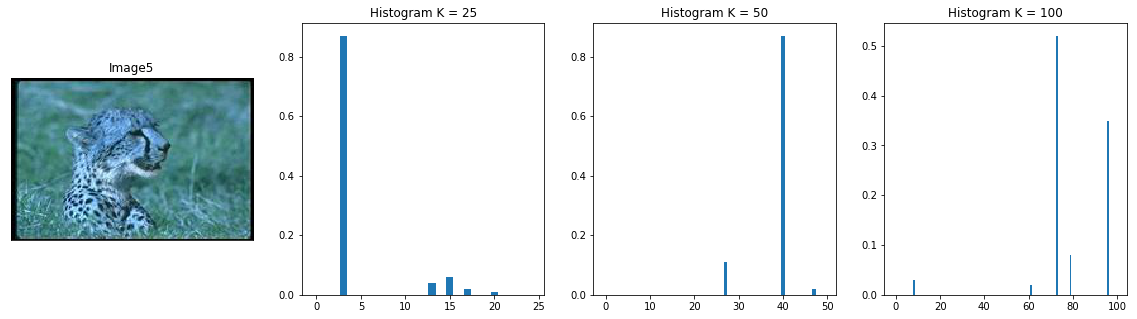

In [7]:
image_folder = []
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/Leopards/*.jpg"):
    image_folder.append(img)

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create(100)   

i = 0
t0 = time.time() 

def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    # compute SIFT descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)
    histogram = np.zeros(K)
    min_index = -1
    min_dist = float('inf')
    for i in range(descriptors.shape[0]):
        for j in range(0, K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1

    total_points = len(descriptors)
    name = np.zeros(K)
    for i in range(0, K):
        histogram[i] /= total_points
        name[i] = str(i)
    return name, histogram

display_img0 = cv2.imread(image_folder[0])
name00, hist00 = find_histogram(image_folder[0], 25, centers25)
name01, hist01 = find_histogram(image_folder[0], 50, centers50)
name02, hist02 = find_histogram(image_folder[0], 100, centers100)

display_img1 = cv2.imread(image_folder[1])
name11, hist11 = find_histogram(image_folder[1], 25, centers25)
name12, hist12 = find_histogram(image_folder[1], 50, centers50)
name13, hist13 = find_histogram(image_folder[1], 100, centers100)

display_img2 = cv2.imread(image_folder[2])
name21, hist21 = find_histogram(image_folder[2], 25, centers25)
name22, hist22 = find_histogram(image_folder[2], 50, centers50)
name23, hist23 = find_histogram(image_folder[2], 100, centers100)

display_img3 = cv2.imread(image_folder[3])
name31, hist31 = find_histogram(image_folder[3], 25, centers25)
name32, hist32 = find_histogram(image_folder[3], 50, centers50)
name33, hist33 = find_histogram(image_folder[3], 100, centers100)

display_img4 = cv2.imread(image_folder[4])
name41, hist41 = find_histogram(image_folder[4], 25, centers25)
name42, hist42 = find_histogram(image_folder[4], 50, centers50)
name43, hist43 = find_histogram(image_folder[4], 100, centers100)
    
print("Elapsed time:", time.time() - t0)

# display images
plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img0, cmap="gray")
plt.title("Image1"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name00, hist00)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name01, hist01)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name02, hist02)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img1, cmap="gray")
plt.title("Image2"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name11, hist11)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name12, hist12)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name13, hist13)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img2, cmap="gray")
plt.title("Image3"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name21, hist21)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name22, hist22)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name23, hist23)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img3, cmap="gray")
plt.title("Image4"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name31, hist31)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name32, hist32)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name33, hist33)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img4, cmap="gray")
plt.title("Image5"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name41, hist41)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name42, hist42)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name43, hist43)
plt.title("Histogram K = 100")
plt.show()

## SIFT Motorbikes

Elapsed time: 0.4736800193786621


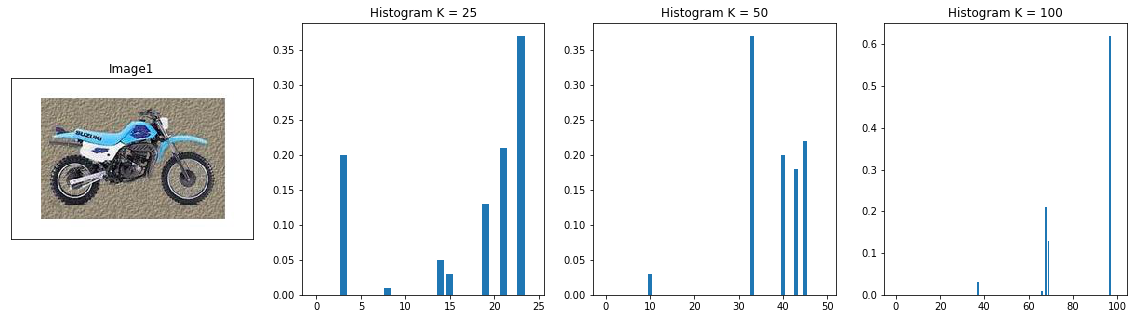

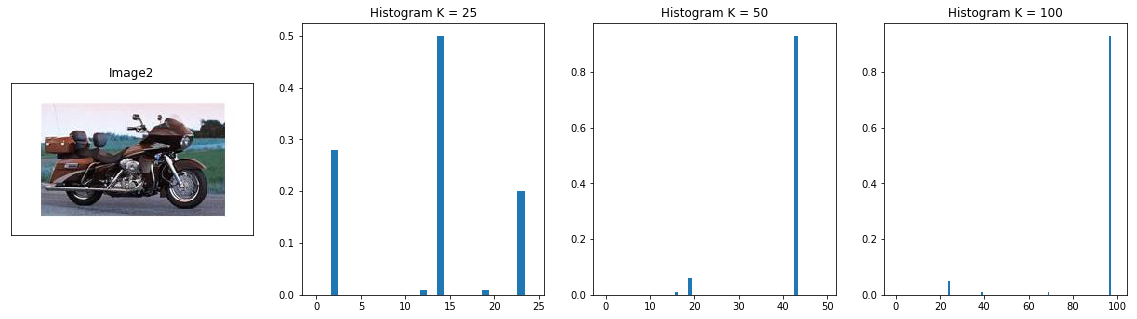

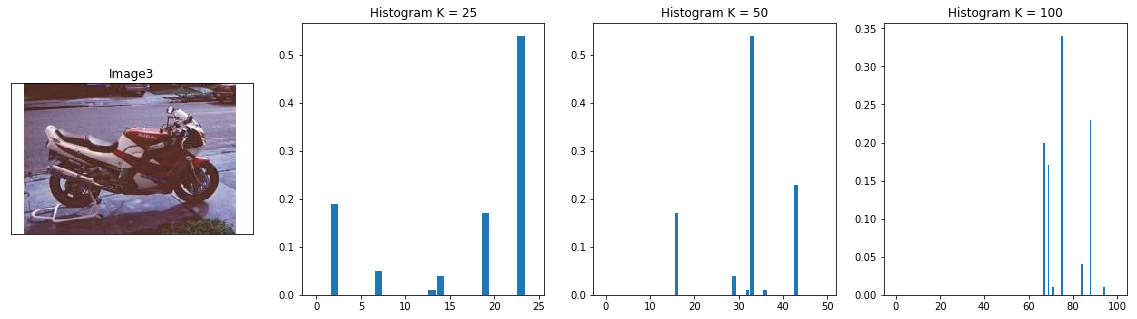

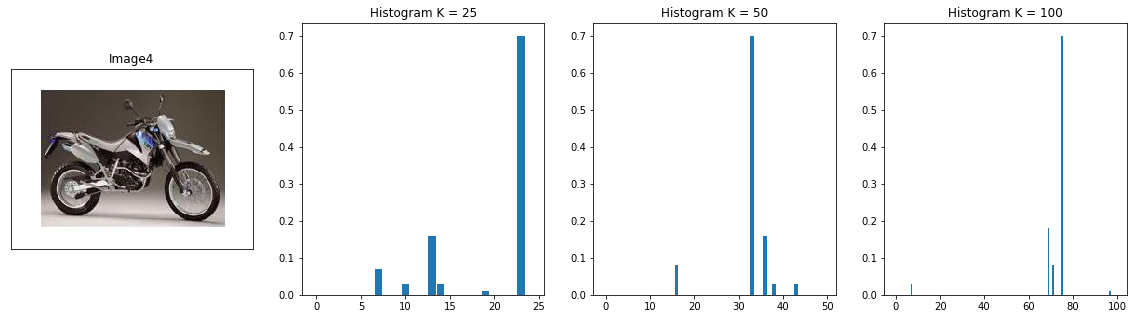

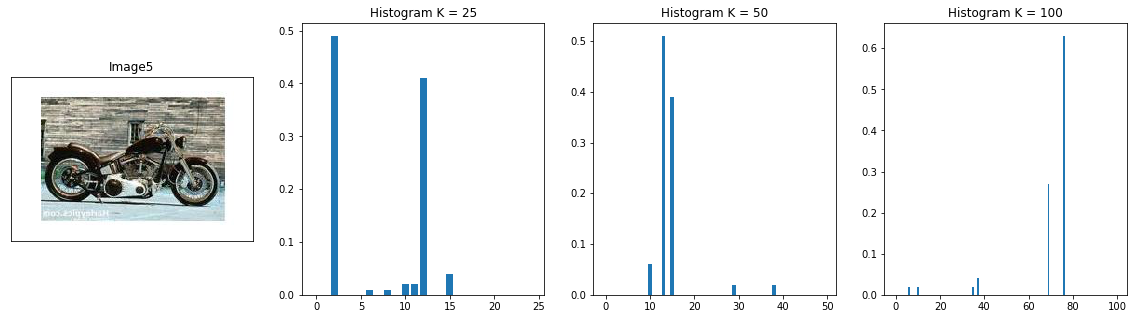

In [8]:
image_folder = []
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/Motorbikes/*.jpg"):
    image_folder.append(img)

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create(100)   

i = 0
t0 = time.time() 

def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    # compute SIFT descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)
    histogram = np.zeros(K)
    min_index = -1
    min_dist = float('inf')
    for i in range(descriptors.shape[0]):
        for j in range(0, K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1

    total_points = len(descriptors)
    name = np.zeros(K)
    for i in range(0, K):
        histogram[i] /= total_points
        name[i] = str(i)
    return name, histogram

display_img0 = cv2.imread(image_folder[0])
name00, hist00 = find_histogram(image_folder[0], 25, centers25)
name01, hist01 = find_histogram(image_folder[0], 50, centers50)
name02, hist02 = find_histogram(image_folder[0], 100, centers100)

display_img1 = cv2.imread(image_folder[1])
name11, hist11 = find_histogram(image_folder[1], 25, centers25)
name12, hist12 = find_histogram(image_folder[1], 50, centers50)
name13, hist13 = find_histogram(image_folder[1], 100, centers100)

display_img2 = cv2.imread(image_folder[2])
name21, hist21 = find_histogram(image_folder[2], 25, centers25)
name22, hist22 = find_histogram(image_folder[2], 50, centers50)
name23, hist23 = find_histogram(image_folder[2], 100, centers100)

display_img3 = cv2.imread(image_folder[3])
name31, hist31 = find_histogram(image_folder[3], 25, centers25)
name32, hist32 = find_histogram(image_folder[3], 50, centers50)
name33, hist33 = find_histogram(image_folder[3], 100, centers100)

display_img4 = cv2.imread(image_folder[4])
name41, hist41 = find_histogram(image_folder[4], 25, centers25)
name42, hist42 = find_histogram(image_folder[4], 50, centers50)
name43, hist43 = find_histogram(image_folder[4], 100, centers100)
    
print("Elapsed time:", time.time() - t0)

# display images
plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img0, cmap="gray")
plt.title("Image1"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name00, hist00)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name01, hist01)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name02, hist02)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img1, cmap="gray")
plt.title("Image2"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name11, hist11)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name12, hist12)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name13, hist13)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img2, cmap="gray")
plt.title("Image3"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name21, hist21)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name22, hist22)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name23, hist23)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img3, cmap="gray")
plt.title("Image4"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name31, hist31)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name32, hist32)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name33, hist33)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img4, cmap="gray")
plt.title("Image5"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name41, hist41)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name42, hist42)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name43, hist43)
plt.title("Histogram K = 100")
plt.show()

## SIFT Watch

Elapsed time: 0.570375919342041


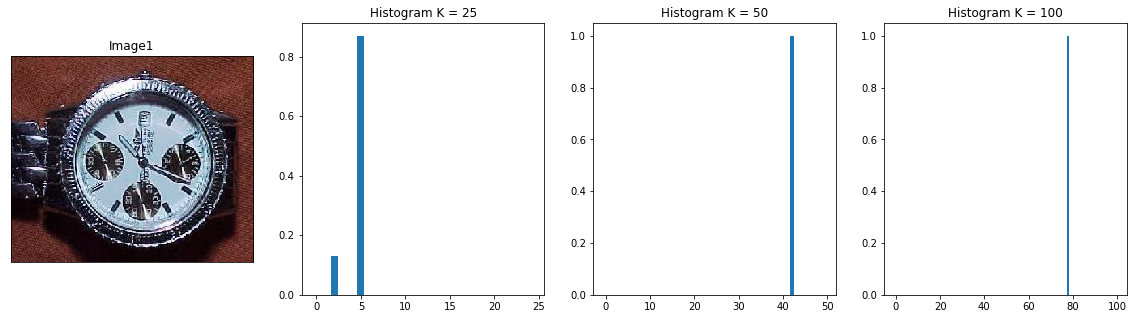

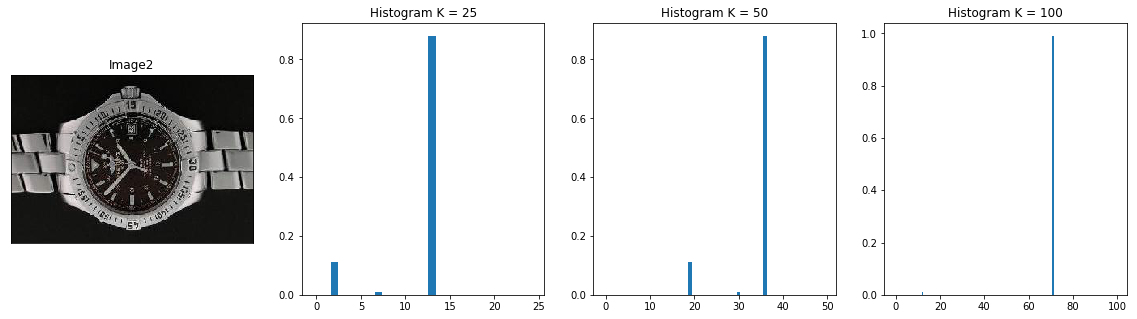

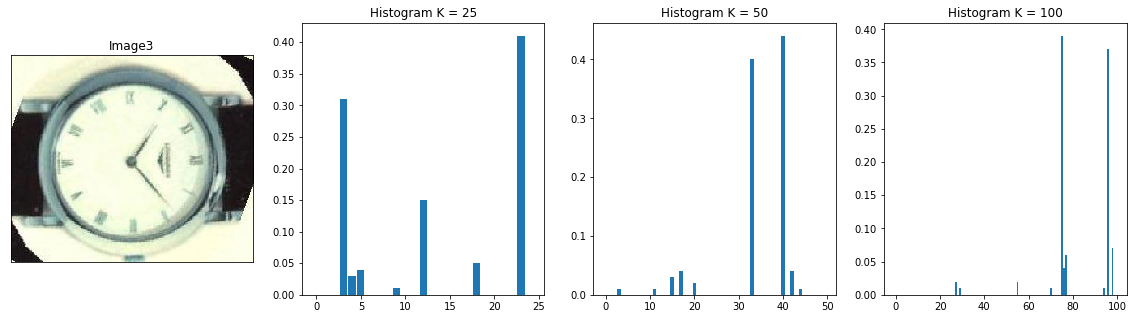

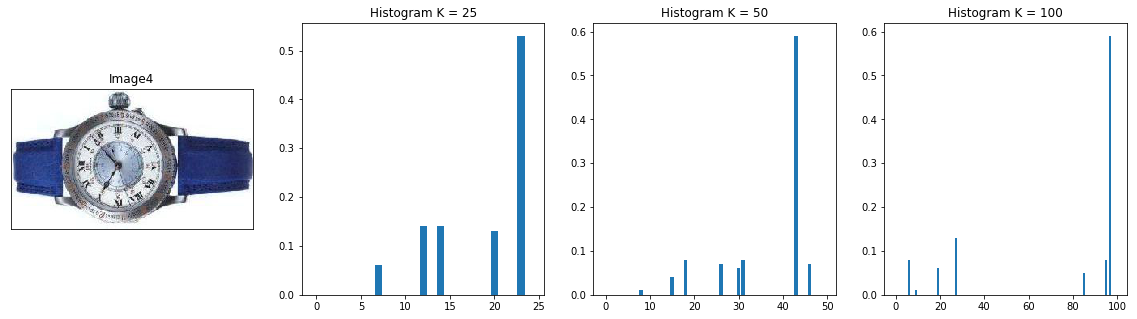

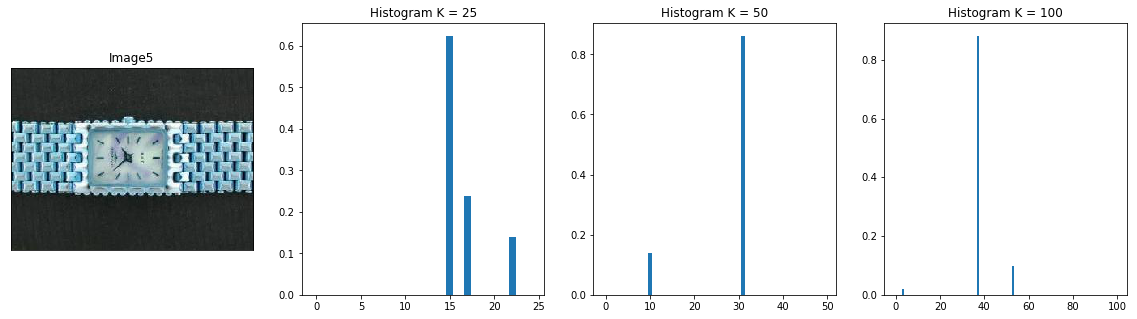

In [9]:
image_folder = []
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/watch/*.jpg"):
    image_folder.append(img)

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create(100)   

i = 0
t0 = time.time() 

def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    # compute SIFT descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)
    histogram = np.zeros(K)
    min_index = -1
    min_dist = float('inf')
    for i in range(descriptors.shape[0]):
        for j in range(0, K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1

    total_points = len(descriptors)
    name = np.zeros(K)
    for i in range(0, K):
        histogram[i] /= total_points
        name[i] = str(i)
    return name, histogram

display_img0 = cv2.imread(image_folder[0])
name00, hist00 = find_histogram(image_folder[0], 25, centers25)
name01, hist01 = find_histogram(image_folder[0], 50, centers50)
name02, hist02 = find_histogram(image_folder[0], 100, centers100)

display_img1 = cv2.imread(image_folder[1])
name11, hist11 = find_histogram(image_folder[1], 25, centers25)
name12, hist12 = find_histogram(image_folder[1], 50, centers50)
name13, hist13 = find_histogram(image_folder[1], 100, centers100)

display_img2 = cv2.imread(image_folder[2])
name21, hist21 = find_histogram(image_folder[2], 25, centers25)
name22, hist22 = find_histogram(image_folder[2], 50, centers50)
name23, hist23 = find_histogram(image_folder[2], 100, centers100)

display_img3 = cv2.imread(image_folder[3])
name31, hist31 = find_histogram(image_folder[3], 25, centers25)
name32, hist32 = find_histogram(image_folder[3], 50, centers50)
name33, hist33 = find_histogram(image_folder[3], 100, centers100)

display_img4 = cv2.imread(image_folder[4])
name41, hist41 = find_histogram(image_folder[4], 25, centers25)
name42, hist42 = find_histogram(image_folder[4], 50, centers50)
name43, hist43 = find_histogram(image_folder[4], 100, centers100)
    
print("Elapsed time:", time.time() - t0)

# display images
plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img0, cmap="gray")
plt.title("Image1"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name00, hist00)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name01, hist01)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name02, hist02)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img1, cmap="gray")
plt.title("Image2"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name11, hist11)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name12, hist12)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name13, hist13)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img2, cmap="gray")
plt.title("Image3"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name21, hist21)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name22, hist22)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name23, hist23)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img3, cmap="gray")
plt.title("Image4"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name31, hist31)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name32, hist32)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name33, hist33)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img4, cmap="gray")
plt.title("Image5"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name41, hist41)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name42, hist42)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name43, hist43)
plt.title("Histogram K = 100")
plt.show()

# Bag-of-Word - HoG (K=25)

Elapsed time: 11.12152886390686


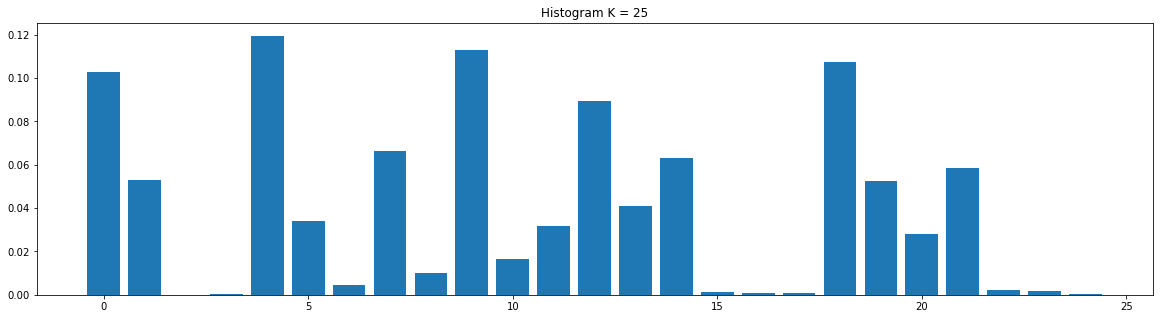

In [10]:
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
import array
import glob

image_folder1 = []
image_folder2 = []
image_folder3 = []
image_folder4 = []
image_folder5 = []
training_set = []

for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/airplanes/*.jpg"):
    image_folder1.append(img)
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/Faces_easy/*.jpg"):
    image_folder2.append(img)
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/Leopards/*.jpg"):
    image_folder3.append(img)  
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/Motorbikes/*.jpg"):
    image_folder4.append(img)    
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/watch/*.jpg"):
    image_folder5.append(img)
    
training_length1 = int(len(image_folder1)/2)
training_length2 = int(len(image_folder2)/2)
training_length3 = int(len(image_folder3)/2)
training_length4 = int(len(image_folder4)/2)
training_length5 = int(len(image_folder5)/2)

for i in range(0, training_length1):
    training_set.append(image_folder1[i])
for i in range(0, training_length2):
    training_set.append(image_folder2[i])
for i in range(0, training_length3):
    training_set.append(image_folder3[i])
for i in range(0, training_length4):
    training_set.append(image_folder4[i])
for i in range(0, training_length5):
    training_set.append(image_folder5[i])
    
# create a HoG object
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
    
total_des = np.array
t0 = time.time() 

def find_histogram(K):  
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
    compactness, labels, centersh25 = cv2.kmeans(total_des, K, None, criteria, 100, flags=cv2.KMEANS_RANDOM_CENTERS)
    freq_plot = np.zeros(K)
    total_points = len(total_des)
    name = np.zeros(K)
    for i in range(0, K):
        A = total_des[labels.ravel()==i]
        freq_plot[i] = A.shape[0]/total_points
        name[i] = str(i)
    return name, freq_plot, centersh25
  
i = True
for images in training_set:
    # load image 
    img = cv2.imread(images)
    descriptors = hog.compute(img,winStride,padding,locations)    
    rows = int(len(descriptors)/36)
    descriptors = descriptors.reshape((rows, 36))
    if i == True:
        total_des = descriptors
        i = False
    else:
        total_des = np.append(total_des, descriptors, axis=0)

name1, freq_plot1, centersh25 = find_histogram(25)
    
print("Elapsed time:", time.time() - t0)
# display images
plt.figure(figsize=(20, 5))
plt.subplot(111), plt.bar(name1, freq_plot1)
plt.title("Histogram K = 25")
plt.show()

# Bag-of-Word - HoG (K=50)

Elapsed time: 16.91543698310852


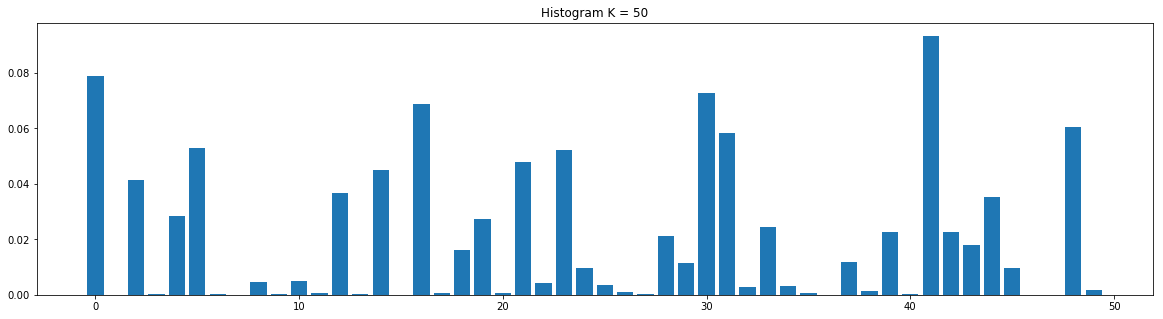

In [11]:
# create a HoG object
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
    
total_des = np.array
t0 = time.time() 

def find_histogram(K):  
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
    compactness, labels, centersh50 = cv2.kmeans(total_des, K, None, criteria, 100, flags=cv2.KMEANS_RANDOM_CENTERS)
    freq_plot = np.zeros(K)
    total_points = len(total_des)
    name = np.zeros(K)
    for i in range(0, K):
        A = total_des[labels.ravel()==i]
        freq_plot[i] = A.shape[0]/total_points
        name[i] = str(i)
    return name, freq_plot, centersh50
  
i = True
for images in training_set:
    # load image 
    img = cv2.imread(images)
    descriptors = hog.compute(img,winStride,padding,locations)    
    rows = int(len(descriptors)/36)
    descriptors = descriptors.reshape((rows, 36))
    if i == True:
        total_des = descriptors
        i = False
    else:
        total_des = np.append(total_des, descriptors, axis=0)

name2, freq_plot2, centersh50 = find_histogram(50)
    
print("Elapsed time:", time.time() - t0)
# display images
plt.figure(figsize=(20, 5))
plt.subplot(111), plt.bar(name2, freq_plot2)
plt.title("Histogram K = 50")
plt.show()

# Bag-of-Word - HoG (K=100)

Elapsed time: 28.41323184967041


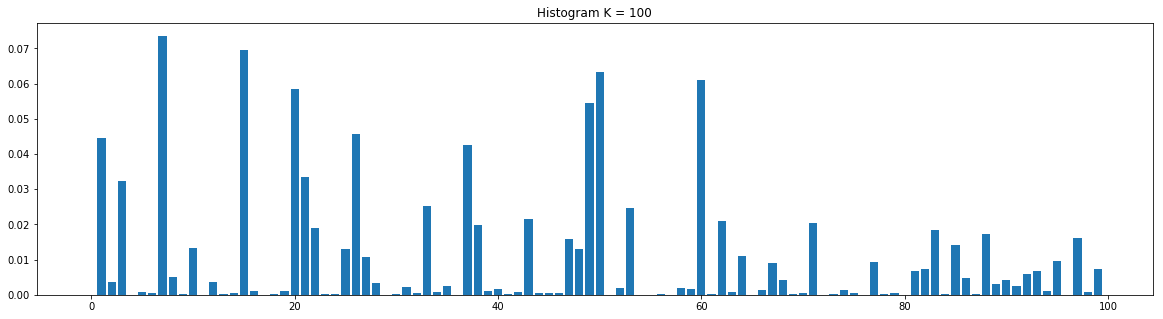

In [12]:
# create a HoG object
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
    
total_des = np.array
t0 = time.time() 

def find_histogram(K):  
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
    compactness, labels, centersh100 = cv2.kmeans(total_des, K, None, criteria, 100, flags=cv2.KMEANS_RANDOM_CENTERS)
    freq_plot = np.zeros(K)
    total_points = len(total_des)
    name = np.zeros(K)
    for i in range(0, K):
        A = total_des[labels.ravel()==i]
        freq_plot[i] = A.shape[0]/total_points
        name[i] = str(i)
    return name, freq_plot, centersh100
  
i = True
for images in training_set:
    # load image 
    img = cv2.imread(images)
    descriptors = hog.compute(img,winStride,padding,locations)    
    rows = int(len(descriptors)/36)
    descriptors = descriptors.reshape((rows, 36))
    if i == True:
        total_des = descriptors
        i = False
    else:
        total_des = np.append(total_des, descriptors, axis=0)

name3, freq_plot3, centersh100 = find_histogram(100)
    
print("Elapsed time:", time.time() - t0)
# display images
plt.figure(figsize=(20, 5))
plt.subplot(111), plt.bar(name3, freq_plot3)
plt.title("Histogram K = 100")
plt.show()

# HoG - Airplane

Elapsed time: 0.1068880558013916


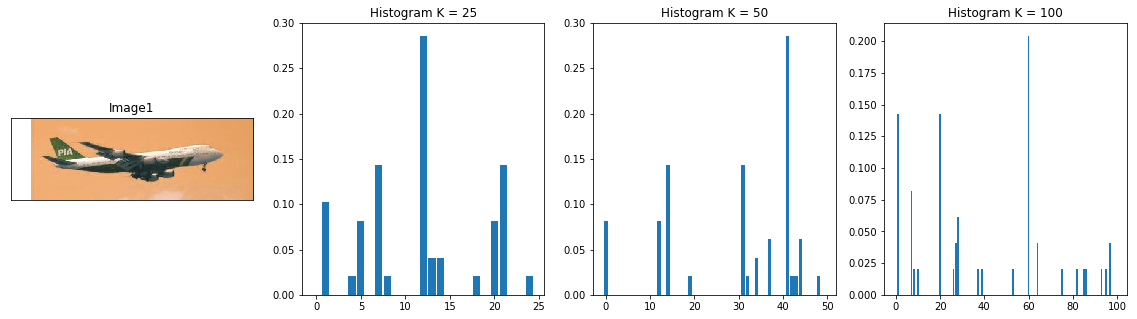

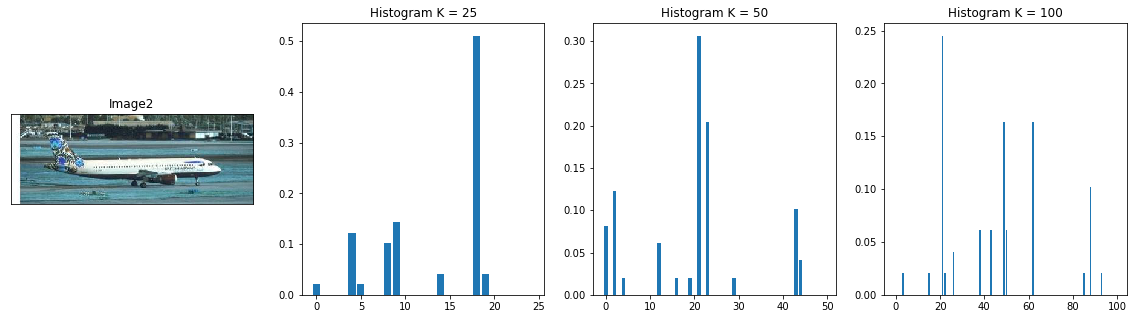

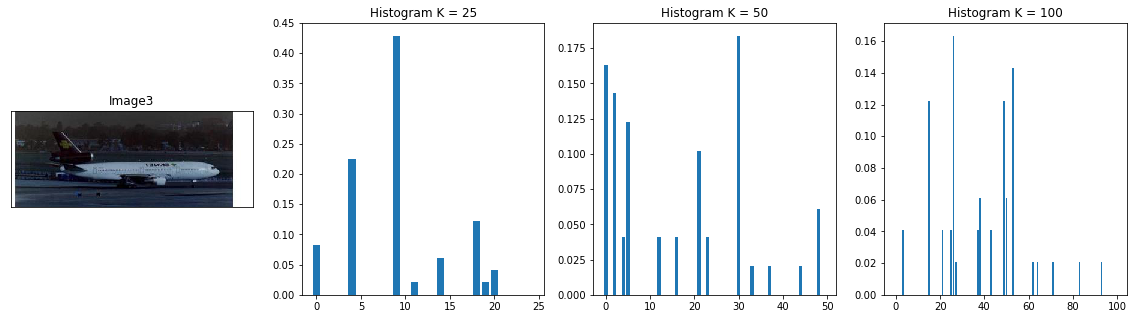

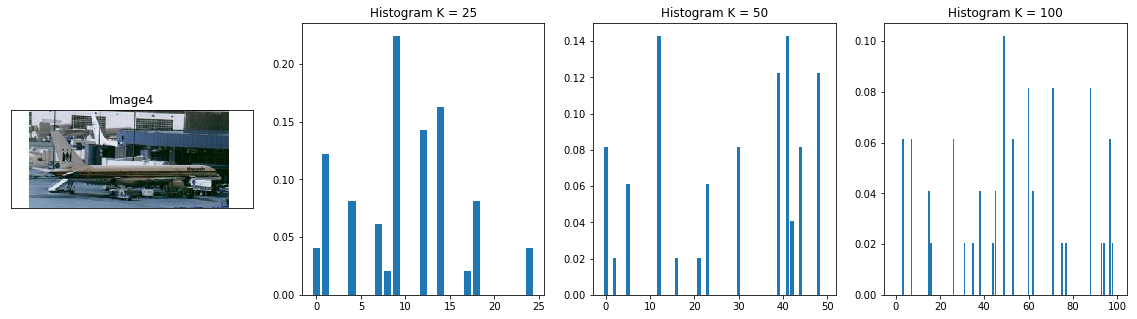

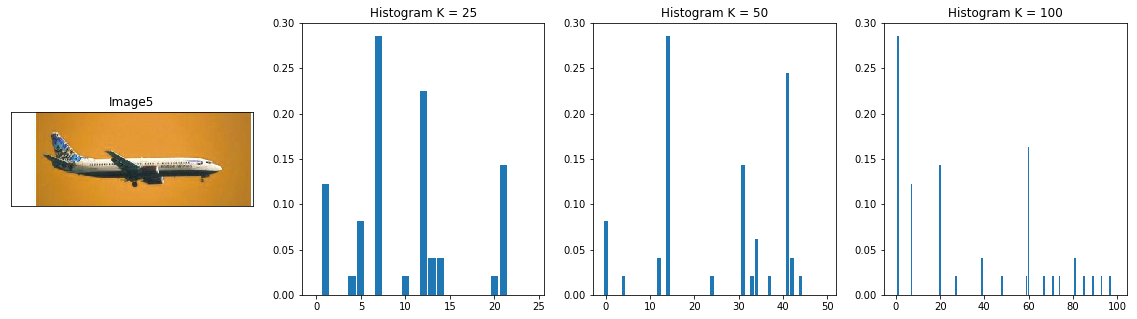

In [21]:
image_folder = []
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/airplanes/*.jpg"):
    image_folder.append(img)

# create a HoG object
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
    
t0 = time.time() 

def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    descriptors = hog.compute(img,winStride,padding,locations)    
    rows = int(len(descriptors)/36)
    descriptors = descriptors.reshape((rows, 36))    
    histogram = np.zeros(K)
    for i in range(len(descriptors)):
        min_index = -1
        min_dist = float('inf')
        for j in range(0, K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1
    total_points = len(descriptors)
    name = np.zeros(K)
    for i in range(0, K):
        histogram[i] /= total_points
        name[i] = str(i)
    return name, histogram

display_img0 = cv2.imread(image_folder[0])
name00, hist00 = find_histogram(image_folder[0], 25, centersh25)
name01, hist01 = find_histogram(image_folder[0], 50, centersh50)
name02, hist02 = find_histogram(image_folder[0], 100, centersh100)

display_img1 = cv2.imread(image_folder[1])
name11, hist11 = find_histogram(image_folder[1], 25, centersh25)
name12, hist12 = find_histogram(image_folder[1], 50, centersh50)
name13, hist13 = find_histogram(image_folder[1], 100, centersh100)

display_img2 = cv2.imread(image_folder[2])
name21, hist21 = find_histogram(image_folder[2], 25, centersh25)
name22, hist22 = find_histogram(image_folder[2], 50, centersh50)
name23, hist23 = find_histogram(image_folder[2], 100, centersh100)

display_img3 = cv2.imread(image_folder[3])
name31, hist31 = find_histogram(image_folder[3], 25, centersh25)
name32, hist32 = find_histogram(image_folder[3], 50, centersh50)
name33, hist33 = find_histogram(image_folder[3], 100, centersh100)

display_img4 = cv2.imread(image_folder[4])
name41, hist41 = find_histogram(image_folder[4], 25, centersh25)
name42, hist42 = find_histogram(image_folder[4], 50, centersh50)
name43, hist43 = find_histogram(image_folder[4], 100, centersh100)
    
print("Elapsed time:", time.time() - t0)

# display images
plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img0, cmap="gray")
plt.title("Image1"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name00, hist00)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name01, hist01)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name02, hist02)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img1, cmap="gray")
plt.title("Image2"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name11, hist11)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name12, hist12)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name13, hist13)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img2, cmap="gray")
plt.title("Image3"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name21, hist21)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name22, hist22)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name23, hist23)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img3, cmap="gray")
plt.title("Image4"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name31, hist31)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name32, hist32)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name33, hist33)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img4, cmap="gray")
plt.title("Image5"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name41, hist41)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name42, hist42)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name43, hist43)
plt.title("Histogram K = 100")
plt.show()

# HoG - Faces

Elapsed time: 0.13524603843688965


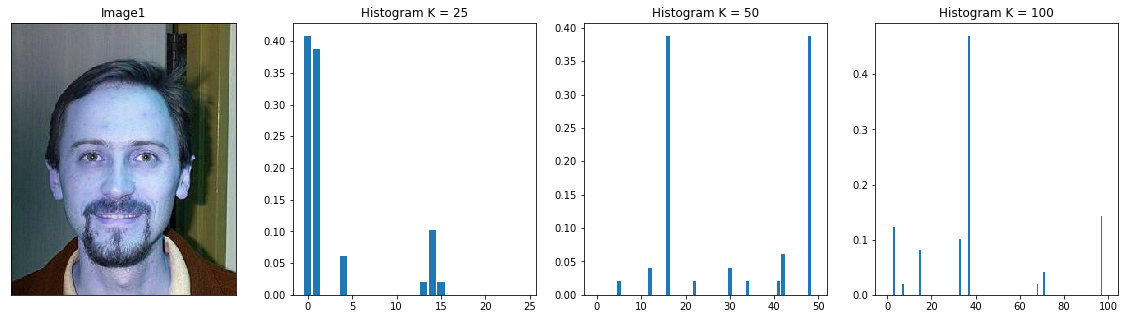

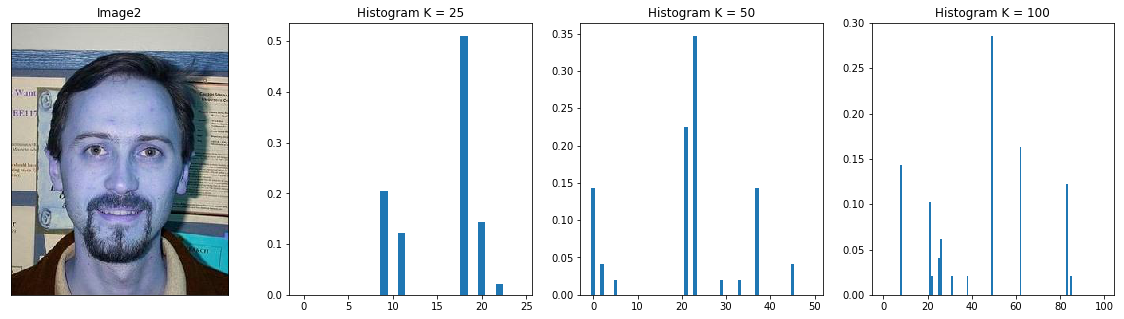

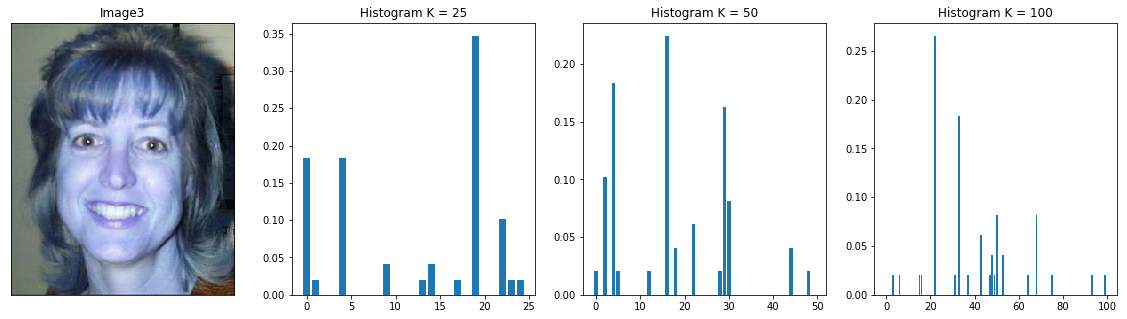

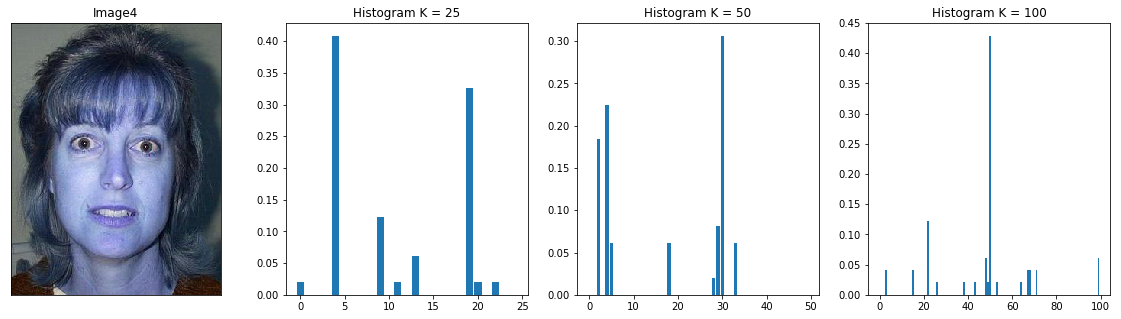

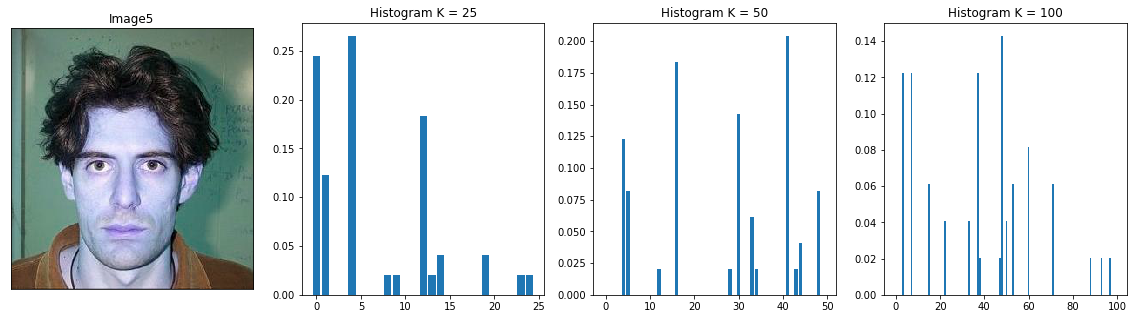

In [25]:
image_folder = []
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/Faces_easy/*.jpg"):
    image_folder.append(img)

# create a HoG object
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
    
t0 = time.time() 

def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    descriptors = hog.compute(img,winStride,padding,locations)    
    rows = int(len(descriptors)/36)
    descriptors = descriptors.reshape((rows, 36))    
    histogram = np.zeros(K)
    for i in range(len(descriptors)):
        min_index = -1
        min_dist = float('inf')
        for j in range(0, K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1
    total_points = len(descriptors)
    name = np.zeros(K)
    for i in range(0, K):
        histogram[i] /= total_points
        name[i] = str(i)
    return name, histogram

display_img0 = cv2.imread(image_folder[0])
name00, hist00 = find_histogram(image_folder[0], 25, centersh25)
name01, hist01 = find_histogram(image_folder[0], 50, centersh50)
name02, hist02 = find_histogram(image_folder[0], 100, centersh100)

display_img1 = cv2.imread(image_folder[1])
name11, hist11 = find_histogram(image_folder[1], 25, centersh25)
name12, hist12 = find_histogram(image_folder[1], 50, centersh50)
name13, hist13 = find_histogram(image_folder[1], 100, centersh100)

display_img2 = cv2.imread(image_folder[2])
name21, hist21 = find_histogram(image_folder[2], 25, centersh25)
name22, hist22 = find_histogram(image_folder[2], 50, centersh50)
name23, hist23 = find_histogram(image_folder[2], 100, centersh100)

display_img3 = cv2.imread(image_folder[3])
name31, hist31 = find_histogram(image_folder[3], 25, centersh25)
name32, hist32 = find_histogram(image_folder[3], 50, centersh50)
name33, hist33 = find_histogram(image_folder[3], 100, centersh100)

display_img4 = cv2.imread(image_folder[4])
name41, hist41 = find_histogram(image_folder[4], 25, centersh25)
name42, hist42 = find_histogram(image_folder[4], 50, centersh50)
name43, hist43 = find_histogram(image_folder[4], 100, centersh100)
    
print("Elapsed time:", time.time() - t0)

# display images
plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img0, cmap="gray")
plt.title("Image1"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name00, hist00)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name01, hist01)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name02, hist02)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img1, cmap="gray")
plt.title("Image2"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name11, hist11)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name12, hist12)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name13, hist13)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img2, cmap="gray")
plt.title("Image3"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name21, hist21)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name22, hist22)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name23, hist23)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img3, cmap="gray")
plt.title("Image4"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name31, hist31)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name32, hist32)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name33, hist33)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img4, cmap="gray")
plt.title("Image5"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name41, hist41)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name42, hist42)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name43, hist43)
plt.title("Histogram K = 100")
plt.show()

# HoG - Leopards

Elapsed time: 0.10220599174499512


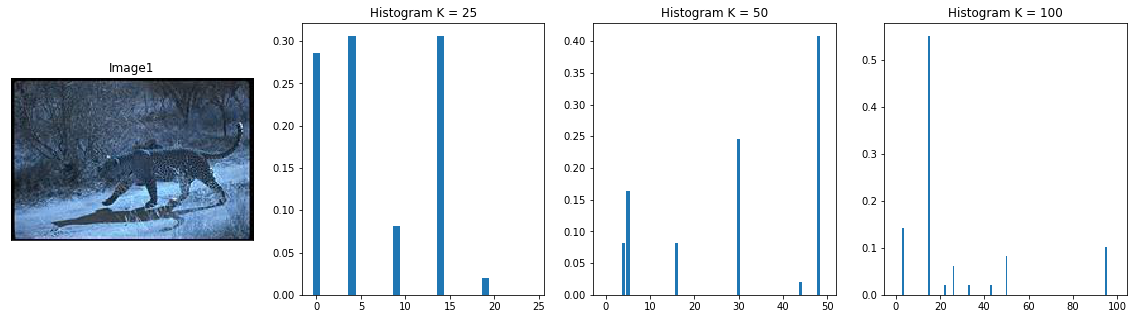

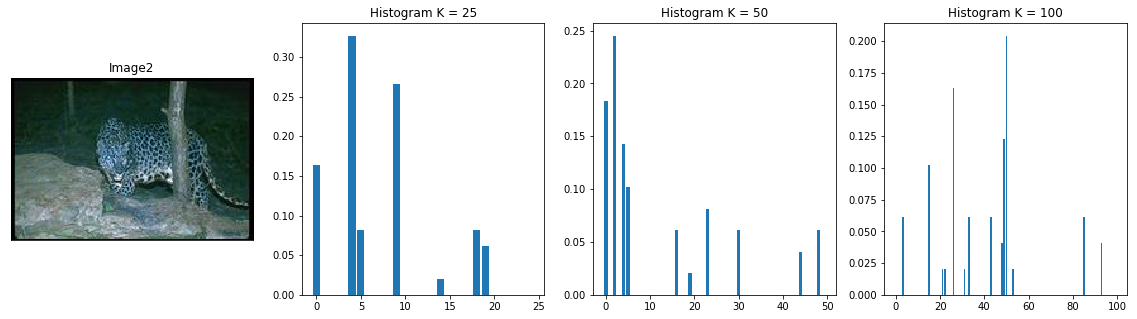

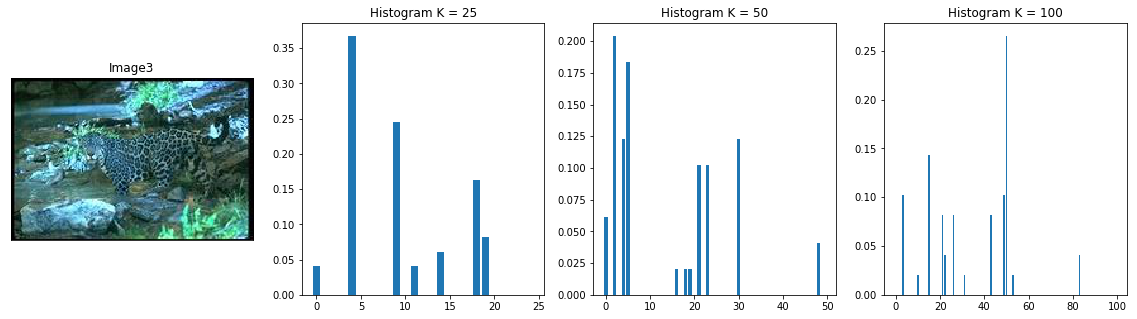

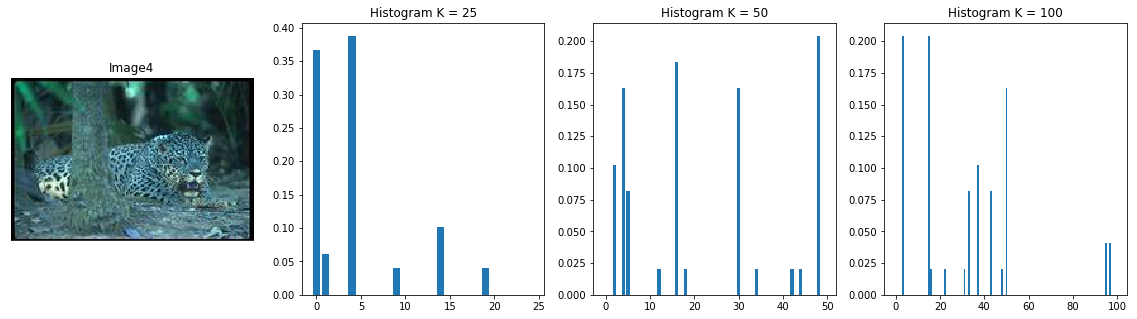

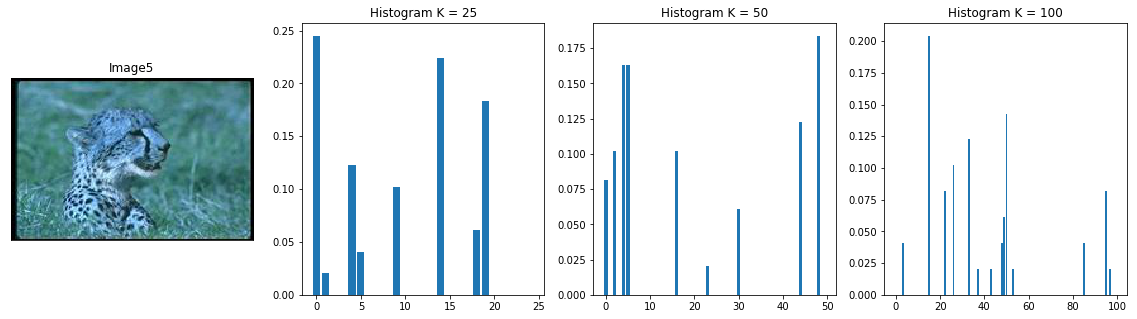

In [26]:
image_folder = []
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/Leopards/*.jpg"):
    image_folder.append(img)

# create a HoG object
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
    
t0 = time.time() 

def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    descriptors = hog.compute(img,winStride,padding,locations)    
    rows = int(len(descriptors)/36)
    descriptors = descriptors.reshape((rows, 36))    
    histogram = np.zeros(K)
    for i in range(len(descriptors)):
        min_index = -1
        min_dist = float('inf')
        for j in range(0, K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1
    total_points = len(descriptors)
    name = np.zeros(K)
    for i in range(0, K):
        histogram[i] /= total_points
        name[i] = str(i)
    return name, histogram

display_img0 = cv2.imread(image_folder[0])
name00, hist00 = find_histogram(image_folder[0], 25, centersh25)
name01, hist01 = find_histogram(image_folder[0], 50, centersh50)
name02, hist02 = find_histogram(image_folder[0], 100, centersh100)

display_img1 = cv2.imread(image_folder[1])
name11, hist11 = find_histogram(image_folder[1], 25, centersh25)
name12, hist12 = find_histogram(image_folder[1], 50, centersh50)
name13, hist13 = find_histogram(image_folder[1], 100, centersh100)

display_img2 = cv2.imread(image_folder[2])
name21, hist21 = find_histogram(image_folder[2], 25, centersh25)
name22, hist22 = find_histogram(image_folder[2], 50, centersh50)
name23, hist23 = find_histogram(image_folder[2], 100, centersh100)

display_img3 = cv2.imread(image_folder[3])
name31, hist31 = find_histogram(image_folder[3], 25, centersh25)
name32, hist32 = find_histogram(image_folder[3], 50, centersh50)
name33, hist33 = find_histogram(image_folder[3], 100, centersh100)

display_img4 = cv2.imread(image_folder[4])
name41, hist41 = find_histogram(image_folder[4], 25, centersh25)
name42, hist42 = find_histogram(image_folder[4], 50, centersh50)
name43, hist43 = find_histogram(image_folder[4], 100, centersh100)
    
print("Elapsed time:", time.time() - t0)

# display images
plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img0, cmap="gray")
plt.title("Image1"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name00, hist00)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name01, hist01)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name02, hist02)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img1, cmap="gray")
plt.title("Image2"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name11, hist11)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name12, hist12)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name13, hist13)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img2, cmap="gray")
plt.title("Image3"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name21, hist21)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name22, hist22)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name23, hist23)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img3, cmap="gray")
plt.title("Image4"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name31, hist31)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name32, hist32)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name33, hist33)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img4, cmap="gray")
plt.title("Image5"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name41, hist41)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name42, hist42)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name43, hist43)
plt.title("Histogram K = 100")
plt.show()

# HoG - Motorbikes

Elapsed time: 0.11052179336547852


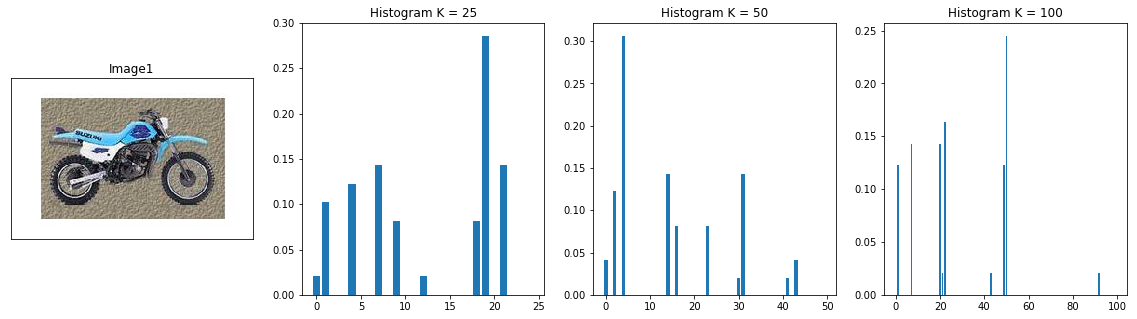

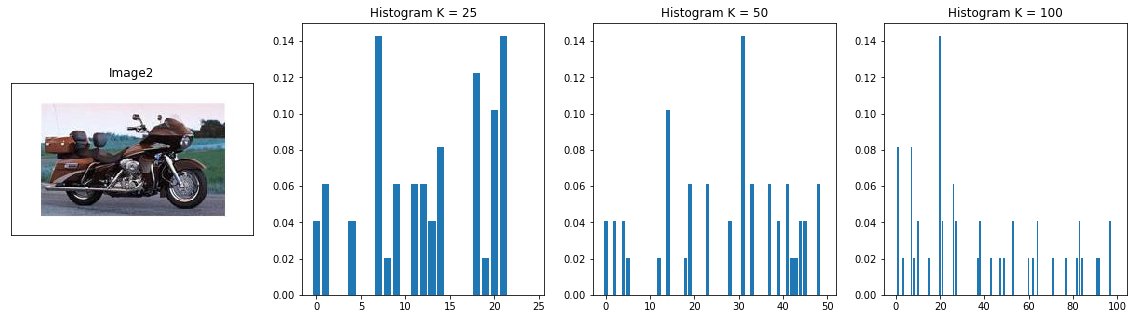

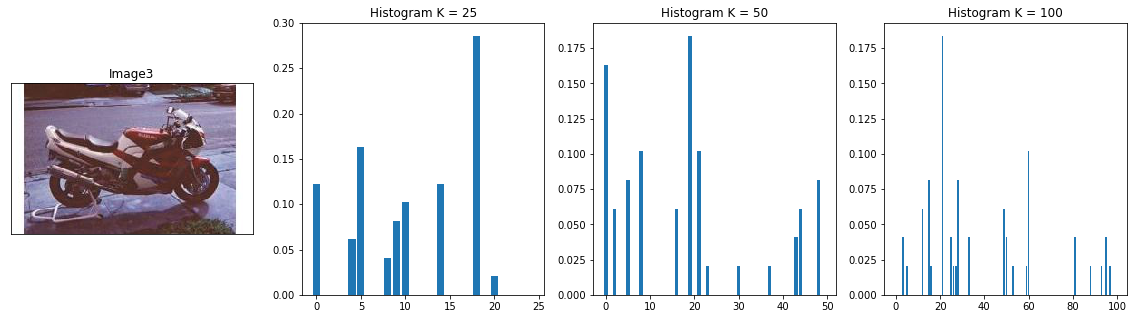

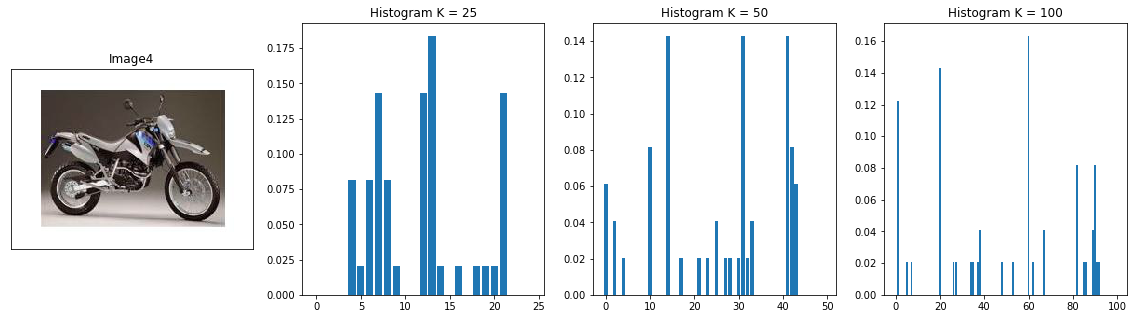

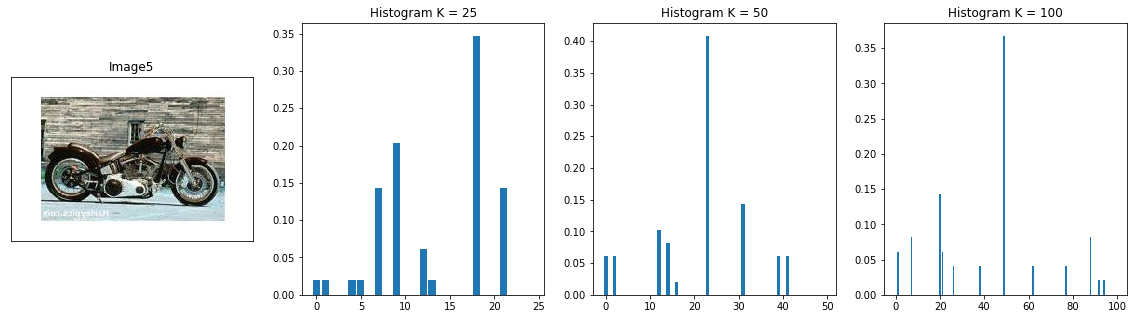

In [27]:
image_folder = []
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/motorbikes/*.jpg"):
    image_folder.append(img)

# create a HoG object
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
    
t0 = time.time() 

def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    descriptors = hog.compute(img,winStride,padding,locations)    
    rows = int(len(descriptors)/36)
    descriptors = descriptors.reshape((rows, 36))    
    histogram = np.zeros(K)
    for i in range(len(descriptors)):
        min_index = -1
        min_dist = float('inf')
        for j in range(0, K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1
    total_points = len(descriptors)
    name = np.zeros(K)
    for i in range(0, K):
        histogram[i] /= total_points
        name[i] = str(i)
    return name, histogram

display_img0 = cv2.imread(image_folder[0])
name00, hist00 = find_histogram(image_folder[0], 25, centersh25)
name01, hist01 = find_histogram(image_folder[0], 50, centersh50)
name02, hist02 = find_histogram(image_folder[0], 100, centersh100)

display_img1 = cv2.imread(image_folder[1])
name11, hist11 = find_histogram(image_folder[1], 25, centersh25)
name12, hist12 = find_histogram(image_folder[1], 50, centersh50)
name13, hist13 = find_histogram(image_folder[1], 100, centersh100)

display_img2 = cv2.imread(image_folder[2])
name21, hist21 = find_histogram(image_folder[2], 25, centersh25)
name22, hist22 = find_histogram(image_folder[2], 50, centersh50)
name23, hist23 = find_histogram(image_folder[2], 100, centersh100)

display_img3 = cv2.imread(image_folder[3])
name31, hist31 = find_histogram(image_folder[3], 25, centersh25)
name32, hist32 = find_histogram(image_folder[3], 50, centersh50)
name33, hist33 = find_histogram(image_folder[3], 100, centersh100)

display_img4 = cv2.imread(image_folder[4])
name41, hist41 = find_histogram(image_folder[4], 25, centersh25)
name42, hist42 = find_histogram(image_folder[4], 50, centersh50)
name43, hist43 = find_histogram(image_folder[4], 100, centersh100)
    
print("Elapsed time:", time.time() - t0)

# display images
plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img0, cmap="gray")
plt.title("Image1"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name00, hist00)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name01, hist01)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name02, hist02)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img1, cmap="gray")
plt.title("Image2"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name11, hist11)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name12, hist12)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name13, hist13)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img2, cmap="gray")
plt.title("Image3"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name21, hist21)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name22, hist22)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name23, hist23)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img3, cmap="gray")
plt.title("Image4"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name31, hist31)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name32, hist32)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name33, hist33)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img4, cmap="gray")
plt.title("Image5"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name41, hist41)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name42, hist42)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name43, hist43)
plt.title("Histogram K = 100")
plt.show()

# HoG - Watch

Elapsed time: 0.1281909942626953


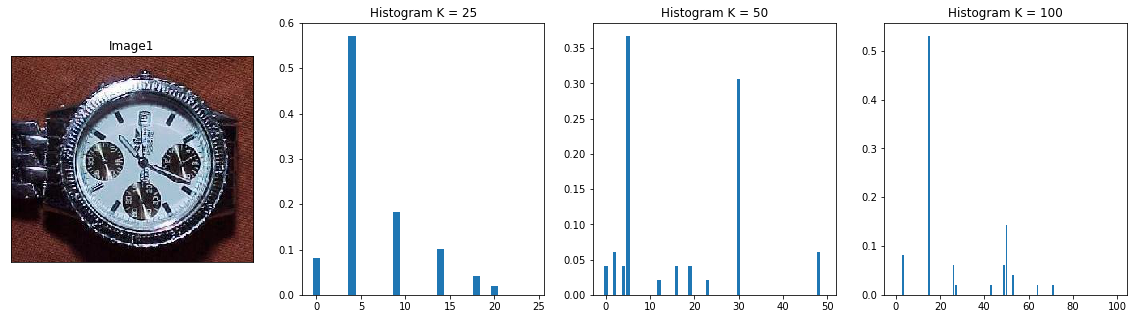

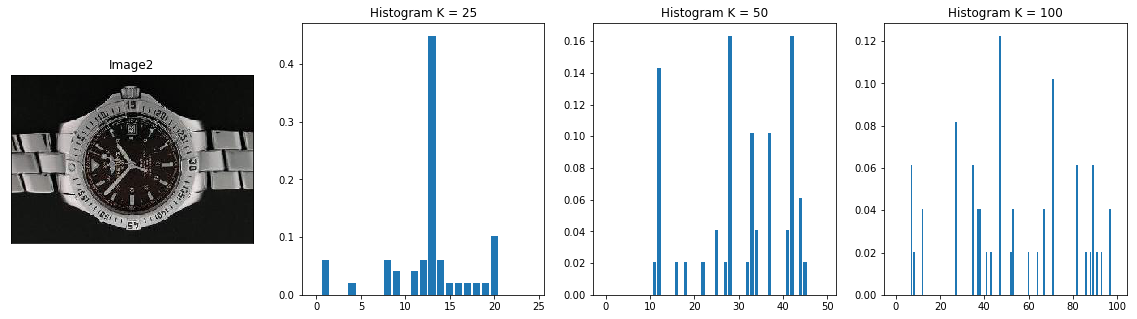

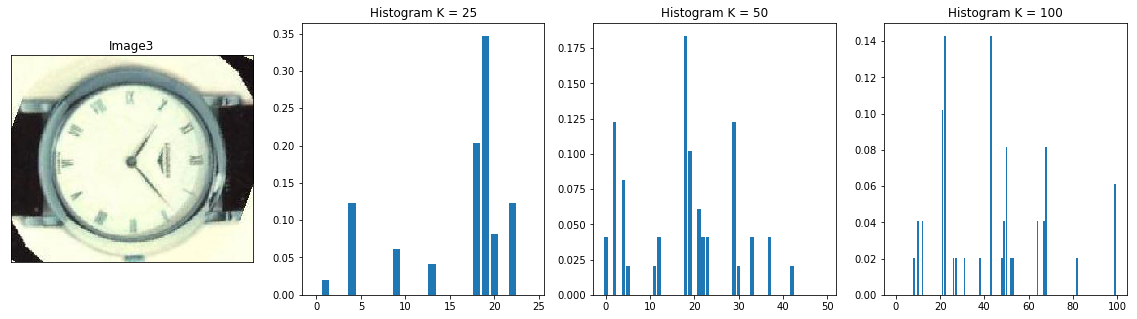

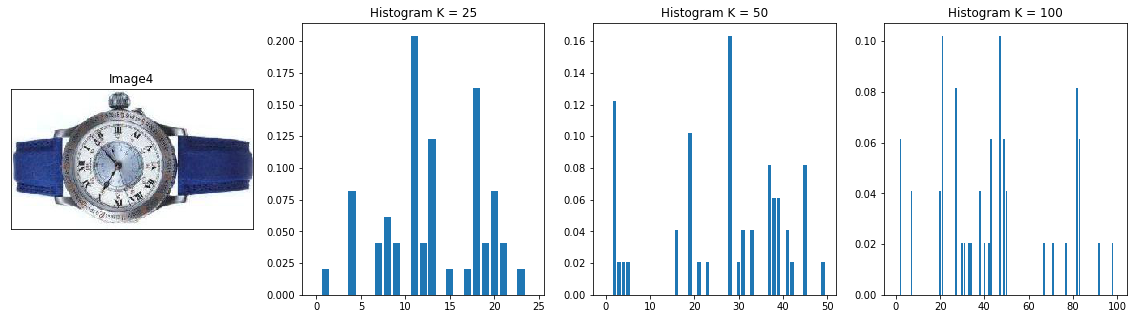

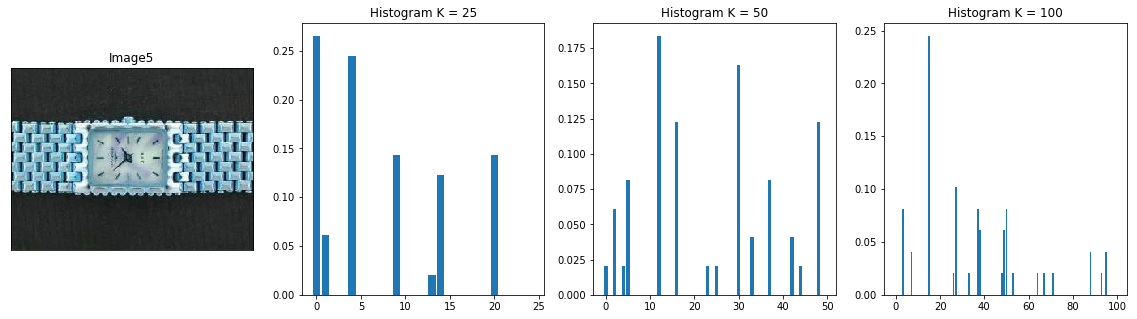

In [28]:
image_folder = []
for img in glob.glob("/Users/Will/Desktop/101_ObjectCategories/watch/*.jpg"):
    image_folder.append(img)

# create a HoG object
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
    
t0 = time.time() 

def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    descriptors = hog.compute(img,winStride,padding,locations)    
    rows = int(len(descriptors)/36)
    descriptors = descriptors.reshape((rows, 36))    
    histogram = np.zeros(K)
    for i in range(len(descriptors)):
        min_index = -1
        min_dist = float('inf')
        for j in range(0, K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1
    total_points = len(descriptors)
    name = np.zeros(K)
    for i in range(0, K):
        histogram[i] /= total_points
        name[i] = str(i)
    return name, histogram

display_img0 = cv2.imread(image_folder[0])
name00, hist00 = find_histogram(image_folder[0], 25, centersh25)
name01, hist01 = find_histogram(image_folder[0], 50, centersh50)
name02, hist02 = find_histogram(image_folder[0], 100, centersh100)

display_img1 = cv2.imread(image_folder[1])
name11, hist11 = find_histogram(image_folder[1], 25, centersh25)
name12, hist12 = find_histogram(image_folder[1], 50, centersh50)
name13, hist13 = find_histogram(image_folder[1], 100, centersh100)

display_img2 = cv2.imread(image_folder[2])
name21, hist21 = find_histogram(image_folder[2], 25, centersh25)
name22, hist22 = find_histogram(image_folder[2], 50, centersh50)
name23, hist23 = find_histogram(image_folder[2], 100, centersh100)

display_img3 = cv2.imread(image_folder[3])
name31, hist31 = find_histogram(image_folder[3], 25, centersh25)
name32, hist32 = find_histogram(image_folder[3], 50, centersh50)
name33, hist33 = find_histogram(image_folder[3], 100, centersh100)

display_img4 = cv2.imread(image_folder[4])
name41, hist41 = find_histogram(image_folder[4], 25, centersh25)
name42, hist42 = find_histogram(image_folder[4], 50, centersh50)
name43, hist43 = find_histogram(image_folder[4], 100, centersh100)
    
print("Elapsed time:", time.time() - t0)

# display images
plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img0, cmap="gray")
plt.title("Image1"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name00, hist00)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name01, hist01)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name02, hist02)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img1, cmap="gray")
plt.title("Image2"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name11, hist11)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name12, hist12)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name13, hist13)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img2, cmap="gray")
plt.title("Image3"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name21, hist21)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name22, hist22)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name23, hist23)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img3, cmap="gray")
plt.title("Image4"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name31, hist31)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name32, hist32)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name33, hist33)
plt.title("Histogram K = 100")

plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(display_img4, cmap="gray")
plt.title("Image5"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.bar(name41, hist41)
plt.title("Histogram K = 25")
plt.subplot(143), plt.bar(name42, hist42)
plt.title("Histogram K = 50")
plt.subplot(144), plt.bar(name43, hist43)
plt.title("Histogram K = 100")
plt.show()

# Question 2

In [31]:
from sklearn import svm
training_labels = np.zeros(len(training_set))
for i in range(0, training_length1):
    training_labels[i] = 1
for i in range(0, training_length2):
    training_labels[i + training_length1] = 2
for i in range(0, training_length3):
    training_labels[i + training_length1 + training_length2] = 3
for i in range(0, training_length4):
    training_labels[i + training_length1 + training_length2 + training_length3] = 4    
for i in range(0, training_length5):
    training_labels[i + training_length1 + training_length2 + training_length3 + training_length4] = 5 

In [32]:
valid_set = []    
valid_length1 = int(len(image_folder1)/4) 
valid_length2 = int(len(image_folder2)/4) 
valid_length3 = int(len(image_folder3)/4) 
valid_length4 = int(len(image_folder4)/4)
valid_length5 = int(len(image_folder5)/4) 

for i in range(0, valid_length1):
    valid_set.append(image_folder1[i + training_length1])
for i in range(0, valid_length2):
    valid_set.append(image_folder2[i + training_length2])
for i in range(0, valid_length3):
    valid_set.append(image_folder3[i + training_length3])
for i in range(0, valid_length4):
    valid_set.append(image_folder4[i + training_length4])
for i in range(0, valid_length5):
    valid_set.append(image_folder5[i + training_length5])
    
valid_labels = np.zeros(len(valid_set))
for i in range(0, valid_length1):
    valid_labels[i] = 1
for i in range(0, valid_length2):
    valid_labels[i + valid_length1] = 2
for i in range(0, valid_length3):
    valid_labels[i + valid_length1 + valid_length2] = 3
for i in range(0, valid_length4):
    valid_labels[i + valid_length1 + valid_length2 + valid_length3] = 4    
for i in range(0, valid_length5):
    valid_labels[i + valid_length1 + valid_length2 + valid_length3 + valid_length4] = 5 

# SVM - SIFT (K=25)

In [45]:
# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create(100)   

t0 = time.time() 
def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    # compute SIFT descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)
    histogram = np.zeros(K)
    for i in range(len(descriptors)):
        min_index = -1
        min_dist = float('inf')
        for j in range(K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1
    cv2.normalize(histogram,histogram, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)    
    return histogram

K = 25
t0 = time.time() 
training_histogram = np.zeros((len(training_set), K))
valid_histogram = np.zeros((len(valid_set), K))

i = 0
for images in training_set:
    histogram = find_histogram(images, K, centers25)
    training_histogram[i] = histogram
    i+=1
    
i = 0
for images in valid_set:
    histogram = find_histogram(images, K, centers25)    
    valid_histogram[i] = histogram
    i+=1

clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(training_histogram, training_labels)
print("Elapsed time:", time.time() - t0) 

predicted = clf.predict(valid_histogram)
actual = valid_labels
same = 0
for i in range(len(valid_labels)):
    if predicted[i] == actual[i]:
        same+=1
accuracy = same/len(valid_labels)
print("There are ", same, " successful prediction")
print("Accuracy: ", accuracy)

Elapsed time: 58.744683027267456
There are  429  successful prediction
Accuracy:  0.6964285714285714


# SVM - SIFT (K=50)

In [46]:
# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create(100)   

t0 = time.time() 
def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    # compute SIFT descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)
    histogram = np.zeros(K)
    for i in range(len(descriptors)):
        min_index = -1
        min_dist = float('inf')
        for j in range(K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1
    cv2.normalize(histogram,histogram, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)    
    return histogram

K = 50
t0 = time.time() 
training_histogram = np.zeros((len(training_set), K))
valid_histogram = np.zeros((len(valid_set), K))

i = 0
for images in training_set:
    histogram = find_histogram(images, K, centers50)
    training_histogram[i] = histogram
    i+=1
    
i = 0
for images in valid_set:
    histogram = find_histogram(images, K, centers50)    
    valid_histogram[i] = histogram
    i+=1

clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(training_histogram, training_labels)
print("Elapsed time:", time.time() - t0) 

predicted = clf.predict(valid_histogram)
actual = valid_labels
same = 0
for i in range(len(valid_labels)):
    if predicted[i] == actual[i]:
        same+=1
accuracy = same/len(valid_labels)
print("There are ", same, " successful prediction")
print("Accuracy: ", accuracy)

Elapsed time: 68.79218816757202
There are  478  successful prediction
Accuracy:  0.775974025974026


# SVM - SIFT (K=100)

In [47]:
# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create(100)   

t0 = time.time() 
def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    # compute SIFT descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)
    histogram = np.zeros(K)
    for i in range(len(descriptors)):
        min_index = -1
        min_dist = float('inf')
        for j in range(K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1
    cv2.normalize(histogram,histogram, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)    
    return histogram

K = 100
t0 = time.time() 
training_histogram = np.zeros((len(training_set), K))
valid_histogram = np.zeros((len(valid_set), K))

i = 0
for images in training_set:
    histogram = find_histogram(images, K, centers100)
    training_histogram[i] = histogram
    i+=1
    
i = 0
for images in valid_set:
    histogram = find_histogram(images, K, centers100)    
    valid_histogram[i] = histogram
    i+=1

clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(training_histogram, training_labels)
print("Elapsed time:", time.time() - t0) 

predicted = clf.predict(valid_histogram)
actual = valid_labels
same = 0
for i in range(len(valid_labels)):
    if predicted[i] == actual[i]:
        same+=1
accuracy = same/len(valid_labels)
print("There are ", same, " successful prediction")
print("Accuracy: ", accuracy)

Elapsed time: 86.77829599380493
There are  497  successful prediction
Accuracy:  0.8068181818181818


# SVM - HoG (K=25)

In [48]:
# create a HoG object
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
    
t0 = time.time() 
def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    descriptors = hog.compute(img,winStride,padding,locations)    
    rows = int(len(descriptors)/36)
    descriptors = descriptors.reshape((rows, 36))    
    histogram = np.zeros(K)
    for i in range(len(descriptors)):
        min_index = -1
        min_dist = float('inf')
        for j in range(K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1
    cv2.normalize(histogram,histogram, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)    
    return histogram

K = 25
t0 = time.time() 
training_histogram = np.zeros((len(training_set), K))
valid_histogram = np.zeros((len(valid_set), K))

i = 0
for images in training_set:
    histogram = find_histogram(images, K, centersh25)
    training_histogram[i] = histogram
    i+=1
    
i = 0
for images in valid_set:
    histogram = find_histogram(images, K, centersh25)    
    valid_histogram[i] = histogram
    i+=1

clf = svm.SVC(gamma=0.0001, C=100.)
clf.fit(training_histogram, training_labels)
print("Elapsed time:", time.time() - t0) 

predicted = clf.predict(valid_histogram)
actual = valid_labels
same = 0
for i in range(len(valid_labels)):
    if predicted[i] == actual[i]:
        same+=1
accuracy = same/len(valid_labels)
print("There are ", same, " successful prediction")
print("Accuracy: ", accuracy)

Elapsed time: 8.057816982269287
There are  403  successful prediction
Accuracy:  0.6542207792207793


# SVM - HoG (K=50)

In [49]:
# create a HoG object
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
    
t0 = time.time() 

def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    descriptors = hog.compute(img,winStride,padding,locations)    
    rows = int(len(descriptors)/36)
    descriptors = descriptors.reshape((rows, 36))    
    histogram = np.zeros(K)
    for i in range(len(descriptors)):
        min_index = -1
        min_dist = float('inf')
        for j in range(K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1
    cv2.normalize(histogram,histogram, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)    
    return histogram

K = 50
t0 = time.time() 
training_histogram = np.zeros((len(training_set), K))
valid_histogram = np.zeros((len(valid_set), K))

i = 0
for images in training_set:
    histogram = find_histogram(images, K, centersh50)
    training_histogram[i] = histogram
    i+=1
    
i = 0
for images in valid_set:
    histogram = find_histogram(images, K, centersh50)    
    valid_histogram[i] = histogram
    i+=1

clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(training_histogram, training_labels)
print("Elapsed time:", time.time() - t0) 

predicted = clf.predict(valid_histogram)
actual = valid_labels
same = 0
for i in range(len(valid_labels)):
    if predicted[i] == actual[i]:
        same+=1
accuracy = same/len(valid_labels)
print("There are ", same, " successful prediction")
print("Accuracy: ", accuracy)

Elapsed time: 12.159504890441895
There are  423  successful prediction
Accuracy:  0.6866883116883117


# SVM - HoG (K=100)

In [50]:
# create a HoG object
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
    
t0 = time.time() 

def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    descriptors = hog.compute(img,winStride,padding,locations)    
    rows = int(len(descriptors)/36)
    descriptors = descriptors.reshape((rows, 36))    
    histogram = np.zeros(K)
    for i in range(len(descriptors)):
        min_index = -1
        min_dist = float('inf')
        for j in range(K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1
    cv2.normalize(histogram,histogram, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)    
    return histogram

K = 100
t0 = time.time() 
training_histogram = np.zeros((len(training_set), K))
valid_histogram = np.zeros((len(valid_set), K))

i = 0
for images in training_set:
    histogram = find_histogram(images, K, centersh100)
    training_histogram[i] = histogram
    i+=1
    
i = 0
for images in valid_set:
    histogram = find_histogram(images, K, centersh100)    
    valid_histogram[i] = histogram
    i+=1

clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(training_histogram, training_labels)
print("Elapsed time:", time.time() - t0) 

predicted = clf.predict(valid_histogram)
actual = valid_labels
same = 0
for i in range(len(valid_labels)):
    if predicted[i] == actual[i]:
        same+=1
accuracy = same/len(valid_labels)
print("There are ", same, " successful prediction")
print("Accuracy: ", accuracy)

Elapsed time: 20.72323203086853
There are  434  successful prediction
Accuracy:  0.7045454545454546


In [52]:
test_set = []    
test_length1 = int(len(image_folder1)/4) 
test_length2 = int(len(image_folder2)/4) 
test_length3 = int(len(image_folder3)/4) 
test_length4 = int(len(image_folder4)/4)
test_length5 = int(len(image_folder5)/4) 

for i in range(0, test_length1):
    test_set.append(image_folder1[i + training_length1 + valid_length1])
for i in range(0, test_length2):
    test_set.append(image_folder2[i + training_length2 + valid_length2])
for i in range(0, test_length3):
    test_set.append(image_folder3[i + training_length3 + valid_length3])
for i in range(0, test_length4):
    test_set.append(image_folder4[i + training_length4 + valid_length4])
for i in range(0, test_length5):
    test_set.append(image_folder5[i + training_length5 + valid_length5])
    
test_labels = np.zeros(len(test_set))
for i in range(0, test_length1):
    test_labels[i] = 1
for i in range(0, test_length2):
    test_labels[i + test_length1] = 2
for i in range(0, test_length3):
    test_labels[i + test_length1 + test_length2] = 3
for i in range(0, test_length4):
    test_labels[i + test_length1 + test_length2 + test_length3] = 4    
for i in range(0, test_length5):
    test_labels[i + test_length1 + test_length2 + test_length3 + test_length4] = 5 

## Test Set using SIFT K = 100 (Top1 Accuracy)

In [54]:
# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create(100)   

t0 = time.time() 
def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    # compute SIFT descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)
    histogram = np.zeros(K)
    for i in range(len(descriptors)):
        min_index = -1
        min_dist = float('inf')
        for j in range(K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1
    cv2.normalize(histogram,histogram, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)    
    return histogram

K = 100
t0 = time.time() 
training_histogram = np.zeros((len(training_set), K))
test_histogram = np.zeros((len(test_set), K))

i = 0
for images in training_set:
    histogram = find_histogram(images, K, centers100)
    training_histogram[i] = histogram
    i+=1
    
i = 0
for images in test_set:
    histogram = find_histogram(images, K, centers100)    
    test_histogram[i] = histogram
    i+=1

clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(training_histogram, training_labels)
print("Elapsed time:", time.time() - t0) 

predicted = clf.predict(test_histogram)
actual = test_labels
same = 0
for i in range(len(test_labels)):
    if predicted[i] == actual[i]:
        same+=1
accuracy = same/len(test_labels)
print("There are ", same, " successful prediction")
print("Accuracy: ", accuracy)

Elapsed time: 90.53415179252625
There are  515  successful prediction
Accuracy:  0.836038961038961


## Test Set using SIFT K = 50 (Top2 Accuracy)

In [55]:
# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create(100)   

t0 = time.time() 
def find_histogram(images, K, centers): 
    # load image 
    img = cv2.imread(images)
    # compute SIFT descriptors
    keypoints, descriptors = sift.detectAndCompute(img, None)
    histogram = np.zeros(K)
    for i in range(len(descriptors)):
        min_index = -1
        min_dist = float('inf')
        for j in range(K):
            dist = cv2.norm(descriptors[i], centers[j], cv2.NORM_L2)
            if dist < min_dist:
                min_index = j
                min_dist = dist
        histogram[min_index] += 1
    cv2.normalize(histogram,histogram, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)    
    return histogram

K = 50
t0 = time.time() 
training_histogram = np.zeros((len(training_set), K))
test_histogram = np.zeros((len(test_set), K))

i = 0
for images in training_set:
    histogram = find_histogram(images, K, centers50)
    training_histogram[i] = histogram
    i+=1
    
i = 0
for images in test_set:
    histogram = find_histogram(images, K, centers50)    
    test_histogram[i] = histogram
    i+=1

clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(training_histogram, training_labels)
print("Elapsed time:", time.time() - t0) 

predicted = clf.predict(test_histogram)
actual = test_labels
same = 0
for i in range(len(test_labels)):
    if predicted[i] == actual[i]:
        same+=1
accuracy = same/len(test_labels)
print("There are ", same, " successful prediction")
print("Accuracy: ", accuracy)

Elapsed time: 62.776526927948
There are  469  successful prediction
Accuracy:  0.7613636363636364


Accuracy Report:
    SIFT:
        K = 20: 69.6%
        K = 50: 77.6%
        K = 100: 80.7%
    HoG:
        K = 20: 65.4%
        K = 50: 68.7%
        K = 100: 70.4%